### 1-La compréhension des données
### 2-Nettoyage des données
    2-1-Renommer les colonnes
    2-2-Nettoyage des outliers
    2-3-Nettoyage des valeurs manquantes
    2-4-Feature selection : reduction des dimensions = Nettoyage par rapport la signification des colonnes
    2-5-Réduction de modalités
    2-6-Nettoyage des outliers
    2-7-Analyse du résultat

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pplt
from datetime import datetime
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime

In [ ]:
pd.set_option('display.max_column',169)
pd.set_option('display.max_row',169)
df = pd.read_excel('v2_QoS_B2B(ORANGE).xlsx')

# 1-La compréhension des données

In [ ]:
df.shape

(1688, 169)

In [ ]:
for col in df:
    print('***',col,' :(',df[col].nunique(),')\n',df[col].unique())

*** 1 - [196] Code enquêteur  :( 20 )
 [    1     6     5     2     4    11     3     0 99999    14    12    13
     7    25    28    20    22    10    15    16]
*** 2 - [197] Numéro du questionnaire  :( 23 )
 [    1     3     2     5     6     7     8     4     9    10    11 99999
    12    13    14    15    16    17    18    19    20    21    22]
*** 3 - [4] S0.1 Code ville  :( 7 )
 ['1. Tunis' '2. Sfax' '1.GABES' 'GABES' 'TUNIS' 'SOUSSE' 'TUNISIE']
*** 4 - [12] S0.2. Sexe :  :( 8 )
 ['1. Homme' '2. Femme' '2. FEMME' 'HOMME' '1. HOMME' 'FEMME' 'HOM%ME' 0]
*** 5 - [198] Code pays  :( 1 )
 [227]
*** 6 - [9] Langue de passation du questionnaire  :( 2 )
 ['Français' 'ENGLAIS']
*** 7 - [14] Date de passation du questionnaire  :( 42 )
 ['14/03/2017' '16/03/2017' '15/03/2017' '17/03/2017' '20/03/2017'
 '21/03/2017' '18/03/2017' '22/03/2017' '23/03/2017' '24/03/2017'
 '25/03/2017' '26/03/2017' '27/03/2017' '28/03/2017' '29/03/2017'
 '30/03/2017' '31/03/2017' datetime.datetime(2017, 1, 4, 0, 

*** 154 - [206] Nom  :( 14 )
 [nan 5 '1 (Très peu probable)' 8 'Non' '1.' 7 '2.' 9 'Tunisie télécom'
 '3.' 'Oui' '10 (Extrêmement probable)' 6 '4.']
*** 155 - [207] Numéro de téléphone  :( 15 )
 [nan '3.' '1.' 8 'Orange' '4.' '2.' 'Non' 9 'Oui' 'Tunisie télécom' 7
 'Ne souhaite pas changer' 6 5 '1 (Très peu probable)']
*** 156 - [208] Nom de l'entreprise  :( 16 )
 [nan 'Non' 'Tunisie télécom' 'Orange' '4.' 9 'Ne souhaite pas changer'
 'Ooredoo' '2.' 8 7 '1.' 'Oui' '3.' 6 5 '6.']
*** Unnamed: 156  :( 20 )
 [nan 'Ne souhaite pas changer' '4.' 'Oui' 8 'Non' 9 6 '2.' 'Anouar' '6.' 7
 'Tunisie télécom' '1.' 'Ooredoo' 'Orange' 'Ras' 'Ghada' 'Ne sait pas' 5
 'Obaida']
*** Unnamed: 157  :( 25 )
 [nan 'Oui' 'Ne souhaite pas changer' '4.' 'Rabaa' 'Jamila' 'Jalel'
 'hedhli' 'ras' 'Ras' 'Abed slem' '6.' 'Ooredoo' 7 'Abdeljaoued'
 'Ne sait pas' 8 5 '1.' 'Orange' 'Non' 'Test' 'Louibi'
 '10 (Extrêmement probable)' 6 'Ben othmen']
*** Unnamed: 158  :( 32 )
 [nan 'Oui' 'Ras' 'Mouhamed' 'Non' 'Ne souhai

In [ ]:
for col in df.select_dtypes('object'):
    print(df[col].value_counts())

1. Tunis    1115
2. Sfax      505
SOUSSE        32
GABES         20
1.GABES       13
TUNIS          2
TUNISIE        1
Name: 3 - [4] S0.1 Code ville, dtype: int64
1. Homme    986
2. Femme    691
HOMME         4
1. HOMME      2
0             2
FEMME         1
HOM%ME        1
2. FEMME      1
Name: 4 - [12] S0.2. Sexe :, dtype: int64
Français    1683
ENGLAIS        5
Name: 6 - [9] Langue de passation du questionnaire, dtype: int64
23/03/2017             169
17/03/2017             138
29/03/2017             109
28/03/2017             109
20/03/2017              98
16/03/2017              92
30/03/2017              70
24/03/2017              69
2017-04-04 00:00:00     68
21/03/2017              64
27/03/2017              59
2017-03-23 00:00:00     58
2017-03-29 00:00:00     47
31/03/2017              45
15/03/2017              40
22/03/2017              38
2017-01-04 00:00:00     37
18/03/2017              36
2017-03-28 00:00:00     33
2017-03-30 00:00:00     30
2017-03-24 00:00:00     26
2

Name: 109 - [135] Q23. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité de la connexion internet [V15] ?, dtype: int64
7                             139
6                             106
8                             100
5                              61
Oui                            25
Non                            24
9                              14
3                              14
10 (La meilleure note)         12
4                              12
1 ( la plus mauvaise note)      6
2                               6
1 (La plus mauvaise note)       5
Name: 110 - [136] Q25.1  l’accessibilité au réseau Internet mobile de votre opérateur, dtype: int64
7                                   146
8                                    97
5                                    86
6                                    67
9                                    37
Non                                  25
3                                    21
10 (La meilleure note)              

Name: 139 - [169] Q40.4 Payez-vous votre facture via internet ?, dtype: int64
Non                                           378
Oui                                            57
Oui, plusieurs fois                             3
Non, mon problème était résolu                  3
6                                               3
1 (La plus mauvaise note)                       2
2.                                              2
3.                                              2
Oui, je suis retourné en boutique / agence      2
4                                               2
Name: 140 - [170] Q40.5 Payez-vous votre facture via Orange Money ?, dtype: int64
Non                                1074
Oui                                 146
6                                     3
Oui, j’ai appelé le call center       2
1 (La plus mauvaise note)             2
Non, mon problème était résolu        2
5                                     2
4                                     2
Name: 141 - [172] Q4

<AxesSubplot:>

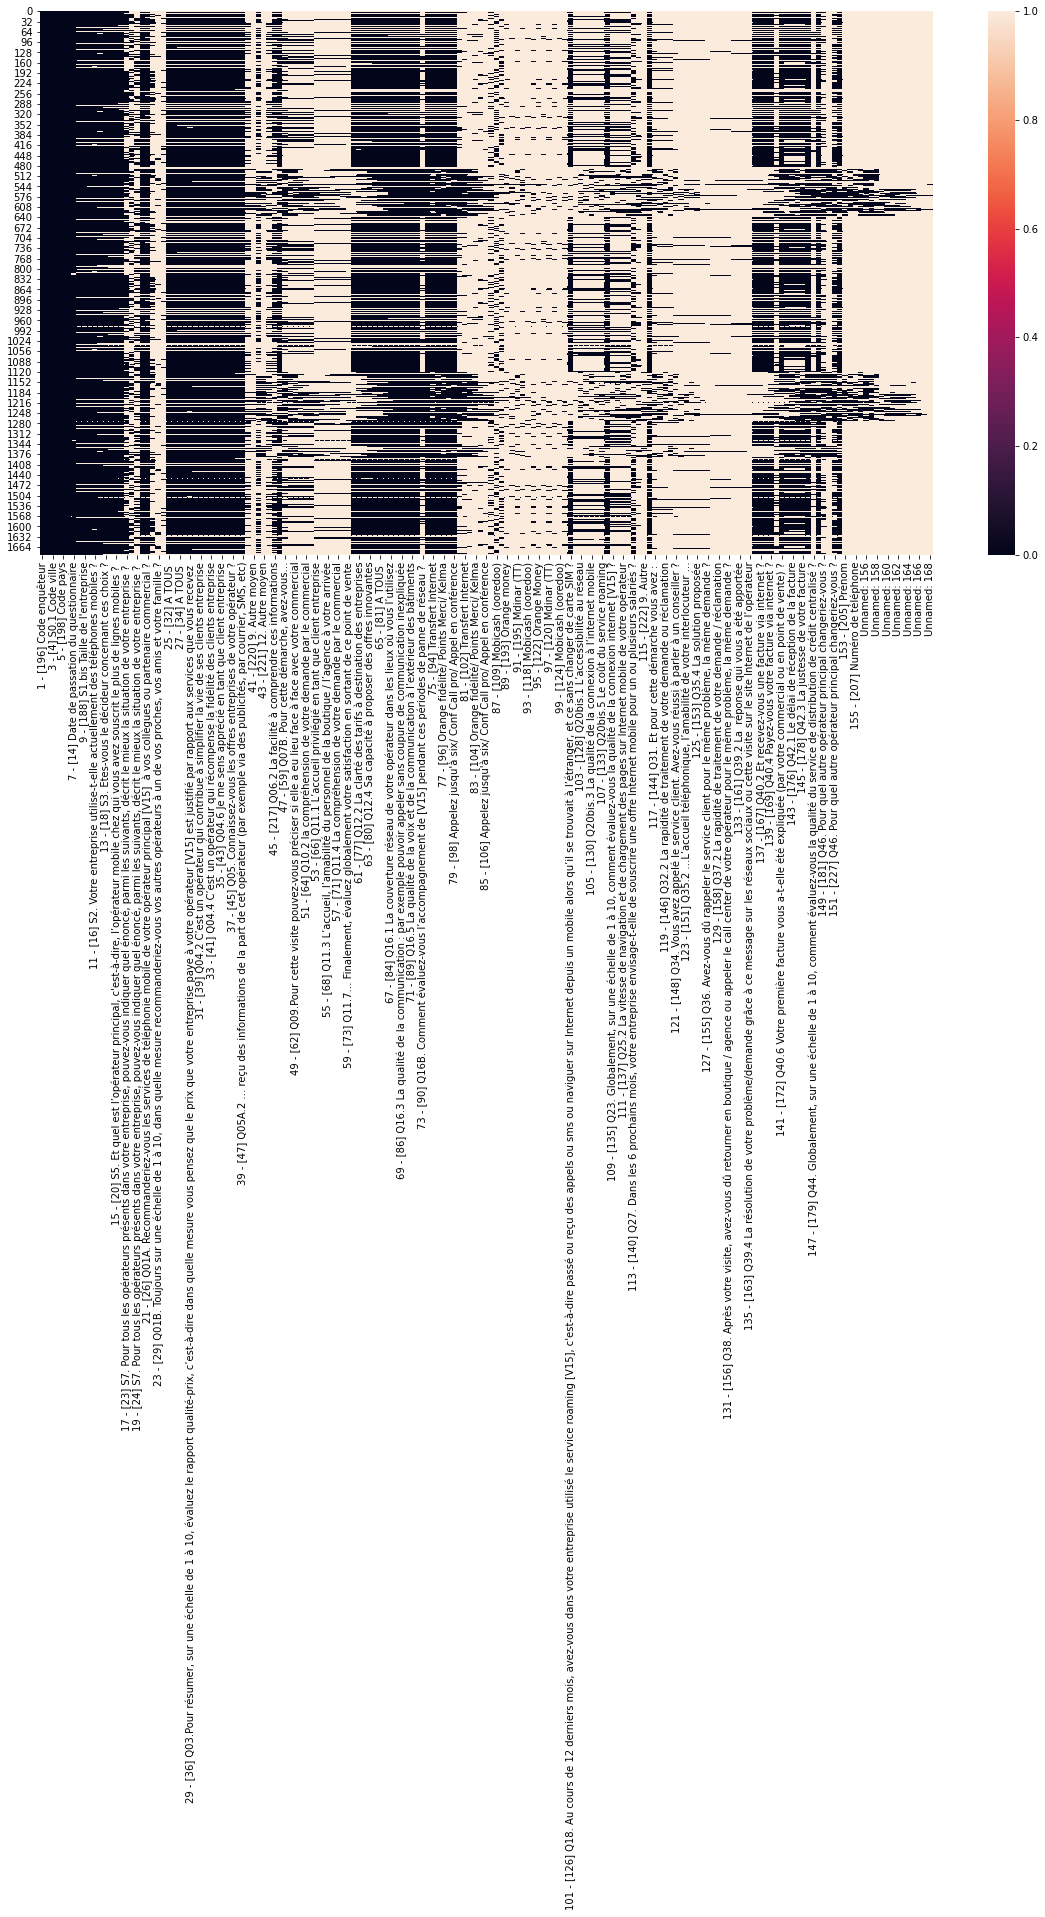

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [ ]:
#nb de valeurs manquantes
str(df.isna().sum().sum())#total

'164775'

In [ ]:
#afficher la liste de pourcentage des valeurs manquantes pour chaque colonne triée par ordre décroissante
(df.isna().sum()/df.shape[0]).sort_values()

1 - [196] Code enquêteur                                                                                                                                                                                                                                                                                                                             0.000000
2 - [197] Numéro du questionnaire                                                                                                                                                                                                                                                                                                                    0.000000
3 - [4] S0.1 Code ville                                                                                                                                                                                                                                                                                     

<AxesSubplot:ylabel='None'>

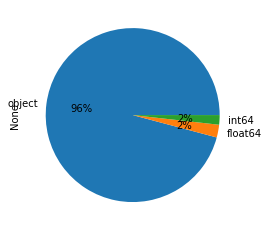

In [ ]:
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

# 2-Nettoyage des données

### 2-1-Renommer les colonnes

In [ ]:
df.rename(
    columns={
            '1 - [196] Code enquêteur':'COD_Investigator',
            '2 - [197] Numéro du questionnaire':'NB_Quest',
            '3 - [4] S0.1 Code ville':'city',
            '4 - [12] S0.2. Sexe :':'Gender',
            '5 - [198] Code pays':'COD_Count',
            '6 - [9] Langue de passation du questionnaire':'Quest_Lang',
            '7 - [14] Date de passation du questionnaire':'Quest_Date',
            '8 - [199] S1. Combien de salariés travaillent dans votre entreprise, c’est-à-dire tous sites confondus, y compris celui où on se trouve ?':'NB_Emp',
            '9 - [188] S1.bis Taille de l\'entreprise':'Size_Comp',
            '10 - [15] S1ter. Dans quel secteur d’activité travaillez-vous ?':'Sect_Comp',
            '11 - [16] S2. Votre entreprise utilise-t-elle actuellement des téléphones mobiles ?':'Mobile_Comp',
            '12 - [17] S2A. Parmi ces téléphones, y a-t-il des Smartphones ?':'Type_Smart',
            '13 - [18] S3. Etes-vous le décideur concernant ces choix ?':'smart_decider',
            '14 - [19] S4. Quels sont tous les opérateurs que votre entreprise utilise':'Opert_Comp',
            '15 - [20] S5. Et quel est l’opérateur principal, c\'est-à-dire, l’opérateur mobile chez qui vous avez souscrit le plus de lignes mobiles ? ':'Opert_Princ',
            '16 - [21] S6. Depuis combien de temps votre entreprise est-elle cliente de cet opérateur principal [V15] ?':'Opert_Period',
            '17 - [23] S7. Pour tous les opérateurs présents dans votre entreprise, pouvez-vous indiquer quel énoncé, parmi les suivants, décrit le mieux la situation de votre entreprise ? ':
            's7_orange',
            '18 - [22] S7. Pour tous les opérateurs présents dans votre entreprise, pouvez-vous indiquer quel énoncé, parmi les suivants, décrit le mieux la situation de votre entreprise ? ':
            's7_Ooreedoo',
            '19 - [24] S7. Pour tous les opérateurs présents dans votre entreprise, pouvez-vous indiquer quel énoncé, parmi les suivants, décrit le mieux la situation de votre entreprise ? ':
            's7_Telecom',
            '20 - [25] S8. Quel type d’offre votre entreprise ou vos salariés ont-ils le plus souscrit chez votre opérateur principal [V15] ?':
            'Opert_Princ_Type_Offer',
            '21 - [26] Q01A. Recommanderiez-vous les services de téléphonie mobile de votre opérateur principal [V15]  à vos collègues ou partenaire commercial ?':
            'Opert_Princ_Recom',
            '22 - [27] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?':
            'Opert_Princ_Recom_Orangef',
            '23 - [29] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?':
            'Opert_Princ_Recom_Oorf',
            '24 - [30] Q01B. Toujours sur une échelle de 1 à 10, dans quelle mesure recommanderiez-vous vos autres opérateurs à un de vos proches, vos amis et votre famille ?':
            'Opert_Princ_Recom_Telf',
            '25 - [32] A TOUS ':
            'Opert_Orange_Offer_Beyond_Expectations',
            '26 - [200] A TOUS ':
            'Opert_Orange_Offer_Below_Expectations',
            '27 - [34] A TOUS ':
            'Opert_Princ_Offer_Eval_Global',
            '28 - [35] Q02. Comment évaluez-vous le COUT GLOBAL des offres et services de [V15] ?  Ce coût inclut le coût de votre/vos contrat/s, les coûts des forfaits, l’achat initial ou les coûts de renouvellement des appareils ainsi que les coûts des communications. Veuillez utiliser une échelle de 1 à 10 où 1 signifie médiocre et 10 excellent.':
            'Opert_Princ_Offer_Eval',
            '29 - [36] Q03.Pour résumer, sur une échelle de 1 à 10, évaluez le rapport qualité-prix, c’est-à-dire dans quelle mesure vous pensez que le prix que votre entreprise paye à votre opérateur [V15] est justifié par rapport aux services que vous recevez ':
            'Opert_Princ_Value_Money',
            '30 - [38] Q04.1 C’est un opérateur qui m’inspire confiance':
            'Opert_Confidence',
            '31 - [39] Q04.2 C’est un opérateur qui contribue à simplifier la vie de ses clients entreprise':
            'Opert_Simplify_Customers',
            '32 - [40] Q04.3 C’est un opérateur qui écoute ses clients et comprend ce qu’ils veulent':
            'Opert_Understand_Customers',
            '33 - [41] Q04.4 C’est un opérateur qui récompense la fidélité des clients entreprise':
            'Opert_Corp_Customers',
            '34 - [42] Q04.5 C’est un opérateur qui résout mes problèmes lorsque c’est  nécessaire':
            'Opert_Prob_Customers',
            '35 - [43] Q04.6 Je me sens apprécié en tant que client entreprise':
            'Opert_Appreciation_Customer',
            '36 - [44] Q04.7 C’est un opérateur qui me propose des offres et services qui me sont essentiels':
            'Opert_Essential_service_Customer',
            '37 - [45] Q05. Connaissez-vous les offres entreprises de votre opérateur ?':
            'Opert_Comp_Offers_K',
            '38 - [46] Q05A.1 … cherché des informations sur l’opérateur de votre entreprise ou ses offres':
            'Opert_offers_Looked',
            '39 - [47] Q05A.2 … reçu des informations de la part de cet opérateur (par exemple via des publicités, par courrier, SMS, etc)':
            'Opert_Information_Receipt',
            '40 - [49] Q05B. Par quels principaux moyens avez-vous trouvé les informations que vous recherchiez ?':
            'Opert_Information_Found',
            '41 - [220] 9. Autre moyen':
            'Other_Option',
            '42 - [52] Q05C. Par quels principaux moyens avez-vous reçu ces informations de la part de votre opérateur ?':
            'Other_Opert_Information_Receipt',
            '43 - [221] 12. Autre moyen':
            'Other_Option_Found',
            '44 - [215] Q06.1 La facilité à trouver les informations que vous recherchiez, quel que soit le moyen (Internet,boutique, etc.)':
            'Info_Facility_Found',
            '45 - [217] Q06.2 La facilité à comprendre ces informations':
            'Info_Facility_Understand',
            '46 - [58] Q07A. Parmi les choix suivants, qu’avez-vous fait dans les 12 derniers mois :':
            'Contract_Operation',
            '47 - [59] Q07B. Pour cette démarche, avez-vous…':
            'Way_For_Operation',
            '48 - [61] Q08.Globalement, sur une échelle de 1 à 10, comment évaluez-vous la visite de ce commercial?':
            'Visit_Eval',
            '49 - [62] Q09.Pour cette visite pouvez-vous préciser si elle a eu lieu face à face avec votre commercial':
            'Visite_Date',
            '50 - [63] Q10.1 L’amabilité du commercial':
            'Store_Staff',
            '51 - [64] Q10.2 la compréhension de votre demande par le commercial':
            'Request_Comprehension',
            '52 - [65] Q10.3 la réponse ou la proposition qui vous a été faite par le commercial':
            'Proposed_solution_in_Store',
            '53 - [66] Q11.1 L’accueil privilégié en tant que client entreprise':
            'privileged welcome as a business customer',
            '54 - [67] Q11.2 Le temps d’attente avant de pouvoir parler à un commercial':
            'Waiting_Time_in_Store',
            '55 - [68] Q11.3 L’accueil, l’amabilité du personnel de la boutique / l’agence à votre arrivée':
            'Commercial_Eval',
            '56 - [69] Q11.8 La façon dont on vous a aidé à occuper votre temps en attendant d’être pris(e) en charge par un commercial':
            'Time_Before_talk',
            '57 - [71] Q11.4 La compréhension de votre demande par le commercial':
            'commercial_understanding',
            '58 - [72] Q11.5 La réponse ou la proposition qui vous a été faite par le commercial':
            'commercial_solution',
            '59 - [73] Q11.7… Finalement, évaluez globalement votre satisfaction en sortant de ce point de vente':
            'Visit_Eval.1',
            '60 - [75] Q12.1 La capacité de [V15] à proposer des offres qui correspondent aux besoins de votre entreprise':
            'Offer_Needs',
            '61 - [77] Q12.2 La clarté des tarifs à destination des entreprises':
            'Prices_clarity',
            '62 - [78] Q12.3 La capacité de [V15] à proposer aux entreprises des offres/services différentes de ses concurrents':
            'Distinguished_Offers',
            '63 - [80] Q12.4 Sa capacité à proposer des offres innovantes':
            'ability innovative offers',
            '64 - [74] Q13. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la mise en service de vos offres et services achetés chez votre opérateur (activation de la flotte mobile, prise en main des téléphones…) ?':
            'Services_Activation',
            '65 - [81] A TOUS ':'Network_Quality',
            '66 - [82] Q15. Arrivez-vous à passer votre appel dès la première tentative ? ': 'Call_efficiency', 
            '67 - [84] Q16.1 La couverture réseau de votre opérateur dans les lieux où vous l’utilisez': 'Network_Coverage',
            '68 - [85] Q16.2 La qualité de la voix : c’est à dire la possibilité d’entendre clairement votre interlocuteur':'Call_Voice_Quality',
            '69 - [86] Q16.3 La qualité de la communication : par exemple pouvoir appeler sans coupure de communication inexpliquée':'Communication_Quality',
            '70 - [88] Q16.4 La qualité de la voix et de la communication à l’intérieur des bâtiments':'Voice_Comm_Inside',
            '71 - [89] Q16.5 La qualité de la voix et de la communication à l’extérieur des bâtiments':'Voice_Comm_Outside',
            '72 - [83] Q16A. Avez-vous subit une panne de réseau de [V15] (coupure, non accessibilité, interruption momentanée) au cours des 6 derniers mois ?':'Breakdown_6_Months',
            '73 - [90] Q16B. Comment évaluez-vous l’accompagnement de [V15] pendant ces périodes de panne de réseau ? ':'Rate_Support',
            '74 - [93] Transfert de crédit':'Trans_Cred',
            '75 - [94] Transfert Internet':'Trans_Internet',
            '76 - [95] SOS crédit / Minute SOS/ SOS Solde':'SOS',
            '77 - [96] Orange fidélité/ Points Merci/ Kelma':'Fidelity_Offers',
            '78 - [97] Messagerie vocale':'Voice_Message',
            '79 - [98] Appelez jusqu\'à six/ Conf Call pro/ Appel en conférence':'Conf_Call',
            '80 - [101] Transfert de crédit':'Rate_Trans_Cred',
            '81 - [102] Transfert Internet':'Rate_Trans_Internet',
            '82 - [103] SOS crédit / Minute SOS/ SOS Solde':'Rate_SOS',
            '83 - [104] Orange fidélité/ Points Merci/ Kelma':'Rate_Fidelity_Offers',
            '84 - [105] Messagerie vocale':'Rate_Voice_Message',
            '85 - [106] Appelez jusqu\'à six/ Conf Call pro/ Appel en conférence':'Rate_Conf_Call',
            '86 - [108] Orange Money':
            'Orange_Money',
            '87 - [109] Mobicash (ooredoo)':
            'Ooredoo_Mobicash',
            '88 - [110] Mdinar (TT)':
            'Telecom_Mdinar',
            '101 - [126] Q18. Au cours de 12 derniers mois, avez-vous dans votre entreprise utilisé le service roaming [V15], c\'est-à-dire passé ou reçu des appels ou sms ou naviguer sur Internet depuis un mobile alors qu’il se trouvait à l’étranger, et ce sans changer de carte SIM ?':
            'Roaming_Service',
            '102 - [127] Q20. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le service roaming [V15] ?':
            'Rate_Roaming_Service',
            '103 - [128] Q20bis.1 L’accessibilité au réseau':
            'Network_Accessibility',
            '104 - [129] Q20bis.2 La qualité de la voix (c’est-à-dire la capacité à entendre clairement votre interlocuteur)':
            'Quality_Voice',
            '105 - [130] Q20bis.3 La qualité de la connexion à l’internet mobile':
            'Quality_Mobile_Internet',
            '106 - [131] Q20bis.4 L’information transmise par votre opérateur sur les coûts d’utilisation du service roaming quand vous arrivez à l’étranger':
            'Info_cost_Roaming_Service',
            '107 - [133] Q20bis.5 Le coût du service roaming':
            'Cost_Roaming_Service',
            '108 - [134] Q21. Votre entreprise a-t-elle souscrit pour un ou plusieurs salariés une offre Internet mobile [V15] ?':
            'Int_Mob_Sal',
            '109 - [135] Q23. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité de la connexion internet [V15] ?':
            'Quality_Internet_Connection',
            '110 - [136] Q25.1  l’accessibilité au réseau Internet mobile de votre opérateur':
            'Mob_Internet_Accessibility',
            '111 - [137] Q25.2 La vitesse de navigation et de chargement des pages sur Internet mobile de votre opérateur':
            'Navigation_Speed_Mobile',
            '112 - [138] Q25.3 Le rapport qualité-prix de l’offre Internet mobile, c’est-à-dire dans quelle mesure vous pensez que le prix que votre entreprise paye est justifié par rapport aux services que vous recevez':
            'Price_Quality_Mob_Int',
            '113 - [140] Q27. Dans les 6 prochains mois, votre entreprise envisage-t-elle de souscrire une offre Internet mobile pour un ou plusieurs salariés ?':'New_MobInt_Off',
            '114 - [141] Q28. Chez quel opérateur ?':'Operator_Name',
            '116 - [143] Q29. Dans les 6 derniers mois, avez-vous eu besoin d’aide auprès de [V15] concernant les offres souscrites ?':'Help_Operator',
            '117 - [144] Q31. Et pour cette démarche vous avez : ':'Action_Procc',
            '118 - [145] Q32.1 La compréhension de votre demande ou réclamation':'Under_request',
            '119 - [146] Q32.2 La rapidité de traitement de votre demande ou réclamation': 'Speed_Request', 
            '120 - [147] Q33. Après cette démarche, avez-vous dû recontacter un commercial pour la même demande / le même problème ?': 'Contact_sales_Request',
            '121 - [148] Q34. Vous avez appelé le service client. Avez-vous réussi à parler à un conseiller ?':'Talk_Consult',
            '136 - [166] Q40.1 Recevez-vous une facture papier par courrier ?':'paper_recieved',
            '137 - [167] Q40.2 Et recevez-vous une facture via internet ?':'Invoice_recieved',
            '138 - [168] Q40.3 Payez-vous votre facture dans un point de vente ?':'Payment_Method',
            '139 - [169] Q40.4 Payez-vous votre facture via internet ?':'Internet_payment',
            '140 - [170] Q40.5 Payez-vous votre facture via Orange Money ?':'Invoice_payment',
            '141 - [172] Q40.6 Votre première facture vous a-t-elle été expliquée (par votre commercial ou en point de vente) ?':'firstInvoice_place',
            '142 - [174] Q41. Globalement, sur une échelle de 1 à 10, comment évaluez-vous le ou les systèmes de facturation proposés par [V15] ?':'InvoicingSystems _estimation',
            '143 - [176] Q42.1 Le délai de réception de la facture':'receiptInvoice _deadline',
            '144 - [177] Q42.2 La facilité à comprendre la facture':'Invoice_easiness',
            '145 - [178] Q42.3 La justesse de votre facture':'Invoice_ correctness',
            '146 - [175] Q43. Utilisez-vous le service de distribution de crédit centralisé pour gérer le rechargement des utilisateurs salariés ?':'using_OfCredit_centralized',
            '147 - [179] Q44. Globalement, sur une échelle de 1 à 10, comment évaluez-vous la qualité du service de distribution de crédit centralisé ?':'serviceDistribCentralizedCredit_quality',
            '148 - [180] Q45. Pour finir, dans quelle mesure est-il probable qu’au cours des 6 prochains mois, [V15] reste le principal opérateur de votre entreprise. Utilisez une échelle de 1 à 10 où 1 signifie très peu probable et 10 extrêmement probable ?':'serviceDistribCentralizedCredit_quality.1',
            '149 - [181] Q46. Pour quel autre opérateur principal changeriez-vous ?':'second_MainOperator',
            '150 - [204] 5.Autre opérateur':'other_operator',
            '151 - [227] Q46. Pour quel autre opérateur principal changeriez-vous ?':'secondMainOperator',
            '152 - [183] Q47. Suite à ce questionnaire, pour être sûr de répondre à vos attentes, acceptez-vous de transmettre votre nom et vos coordonnées avec vos réponses à votre opérateur principal ?':'customer_agreement',
            '153 - [205] Prénom':'customer_firstname',
            '154 - [206] Nom':'customer_lastname',
            '155 - [207] Numéro de téléphone':'Customer_phonenumber',
            "156 - [208] Nom de l'entreprise":'company name'
    },
    inplace=True)

In [ ]:
df.columns

Index(['COD_Investigator', 'NB_Quest', 'city', 'Gender', 'COD_Count',
       'Quest_Lang', 'Quest_Date', 'NB_Emp', 'Size_Comp', 'Sect_Comp',
       ...
       'Unnamed: 159', 'Unnamed: 160', 'Unnamed: 161', 'Unnamed: 162',
       'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165', 'Unnamed: 166',
       'Unnamed: 167', 'Unnamed: 168'],
      dtype='object', length=169)

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values()

COD_Investigator                                                                                                                                                          0.000000
NB_Quest                                                                                                                                                                  0.000000
city                                                                                                                                                                      0.000000
Gender                                                                                                                                                                    0.000000
COD_Count                                                                                                                                                                 0.000000
Quest_Lang                                                                                               

### 2-2-Nettoyage des outliers

In [ ]:
#supprimer tt les lignes ayant une valeur != de nan dans les colonnes unnnamed 156 -> 168 = 13 columns
a=[]
for i in range(len(df)):
    if df.loc[i, "Unnamed: 156":"Unnamed: 168"].isna().sum()<13:#si existe un decalage = une colonne qui n'a pas la valeur nan -> sum =12
        a.append(i)
df=df.drop(a,errors="ignore")
print("nb de ligne restant",df.shape)
df.reset_index(inplace=True, drop=True)

nb de ligne restant (1469, 169)


<AxesSubplot:>

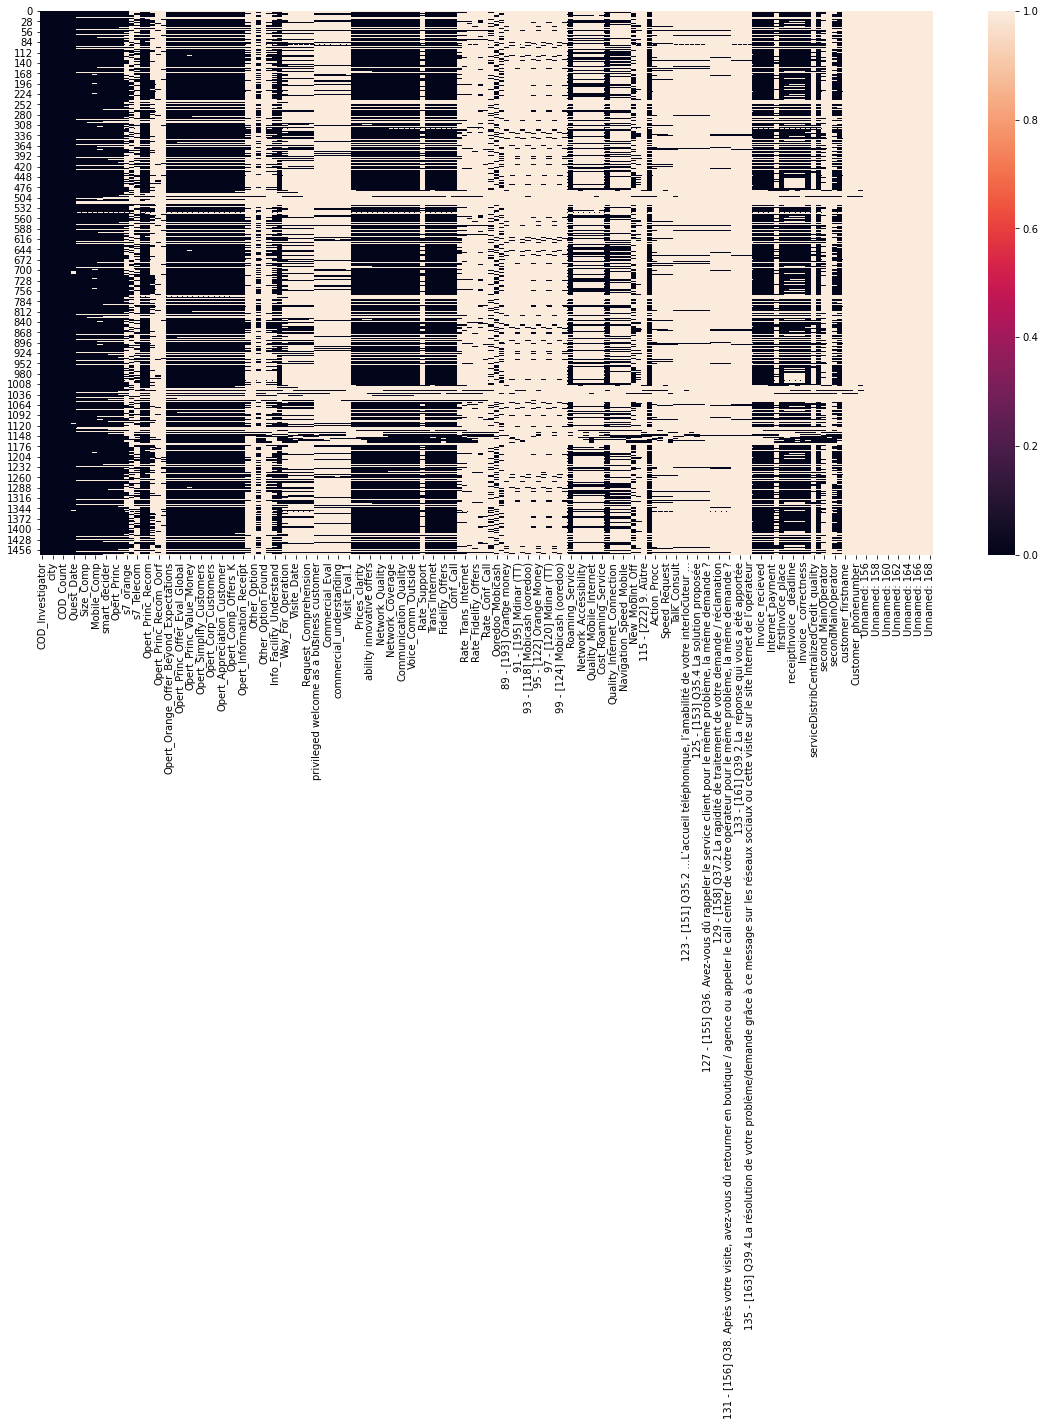

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

### 2-3-Nettoyage des valeurs manquantes

In [ ]:
#nettoyage des valeurs manquantes par rapport les colonnes : < 75%
df=df[df.columns[df.isna().sum()/df.shape[0] < 0.75]]
print("nb de valeurs manquantes : ",str(df.isna().sum().sum()))
print("nb de colonnes restantes",df.shape)
print("les colonnes restantes",df.columns)

nb de valeurs manquantes :  35199
nb de colonnes restantes (1469, 85)
les colonnes restantes Index(['COD_Investigator', 'NB_Quest', 'city', 'Gender', 'COD_Count',
       'Quest_Lang', 'Quest_Date', 'NB_Emp', 'Size_Comp', 'Sect_Comp',
       'Mobile_Comp', 'Type_Smart', 'smart_decider', 'Opert_Comp',
       'Opert_Princ', 'Opert_Period', 's7_orange', 's7_Ooreedoo', 's7_Telecom',
       'Opert_Princ_Type_Offer', 'Opert_Princ_Recom',
       'Opert_Orange_Offer_Beyond_Expectations',
       'Opert_Orange_Offer_Below_Expectations',
       'Opert_Princ_Offer_Eval_Global', 'Opert_Princ_Offer_Eval',
       'Opert_Princ_Value_Money', 'Opert_Confidence',
       'Opert_Simplify_Customers', 'Opert_Understand_Customers',
       'Opert_Corp_Customers', 'Opert_Prob_Customers',
       'Opert_Appreciation_Customer', 'Opert_Essential_service_Customer',
       'Opert_Comp_Offers_K', 'Opert_offers_Looked',
       'Opert_Information_Receipt', 'Opert_Information_Found',
       'Other_Opert_Information_Receip

In [ ]:
#nettoyage des valeurs manquantes par les lignes : < 90%

a=[]
for i in range(len(df)):
    if (df.iloc[i].isna().sum()/df.shape[1])>0.9:
        a.append(i)
df=df.drop(a,errors="ignore")
print("nb de ligne restant",df.shape)
df.reset_index(inplace=True, drop=True)

nb de ligne restant (1354, 85)


### 2-4-Feature Selection : reduction des dimensions = Nettoyage par rapport la signification des colonnes

In [ ]:
for col in df:
    print('***',col,' :(',df[col].nunique(),')\n',df[col].unique())

*** COD_Investigator  :( 20 )
 [    1     6     5     2    11     3     0 99999     4    14    12    13
     7    25    28    20    22    10    15    16]
*** NB_Quest  :( 23 )
 [    1     3     2     5     6     7     8     4     9    10 99999    11
    12    13    14    15    16    17    18    19    20    21    22]
*** city  :( 7 )
 ['1. Tunis' '2. Sfax' '1.GABES' 'GABES' 'TUNIS' 'SOUSSE' 'TUNISIE']
*** Gender  :( 7 )
 ['1. Homme' '2. Femme' '2. FEMME' '1. HOMME' 'HOMME' 'HOM%ME' 0]
*** COD_Count  :( 1 )
 [227]
*** Quest_Lang  :( 2 )
 ['Français' 'ENGLAIS']
*** Quest_Date  :( 40 )
 ['14/03/2017' '16/03/2017' '15/03/2017' '17/03/2017' '20/03/2017'
 '21/03/2017' '18/03/2017' '22/03/2017' '23/03/2017' '24/03/2017'
 '25/03/2017' '26/03/2017' '27/03/2017' '28/03/2017' '29/03/2017'
 '30/03/2017' '31/03/2017' datetime.datetime(2017, 1, 4, 0, 0)
 datetime.datetime(2017, 4, 4, 0, 0) datetime.datetime(2017, 3, 4, 0, 0)
 datetime.datetime(2017, 6, 4, 0, 0) datetime.datetime(2017, 5, 4, 0, 0)
 da

In [ ]:
df.drop("COD_Count",axis=1,inplace=True,errors="ignore")#1 seule modalité
df.drop("NB_Quest",axis=1,inplace=True,errors="ignore")#non significative
df.drop('COD_Investigator',axis=1,inplace=True,errors="ignore")#non significative
df.drop('customer_agreement',axis=1,inplace=True,errors="ignore")#non significative
df.drop('Quest_Lang',axis=1,inplace=True,errors="ignore")#non significative
df.drop('smart_decider',axis=1,inplace=True,errors="ignore")#non significative
df.drop('Mobile_Comp',axis=1,inplace=True,errors="ignore")#non significative

In [ ]:
df.shape

(1354, 78)

2-5-Réduction de modalités

In [ ]:
df.columns


Index(['city', 'Gender', 'Quest_Date', 'NB_Emp', 'Size_Comp', 'Sect_Comp',
       'Type_Smart', 'Opert_Comp', 'Opert_Princ', 'Opert_Period', 's7_orange',
       's7_Ooreedoo', 's7_Telecom', 'Opert_Princ_Type_Offer',
       'Opert_Princ_Recom', 'Opert_Orange_Offer_Beyond_Expectations',
       'Opert_Orange_Offer_Below_Expectations',
       'Opert_Princ_Offer_Eval_Global', 'Opert_Princ_Offer_Eval',
       'Opert_Princ_Value_Money', 'Opert_Confidence',
       'Opert_Simplify_Customers', 'Opert_Understand_Customers',
       'Opert_Corp_Customers', 'Opert_Prob_Customers',
       'Opert_Appreciation_Customer', 'Opert_Essential_service_Customer',
       'Opert_Comp_Offers_K', 'Opert_offers_Looked',
       'Opert_Information_Receipt', 'Opert_Information_Found',
       'Other_Opert_Information_Receipt', 'Info_Facility_Found',
       'Info_Facility_Understand', 'Contract_Operation', 'Way_For_Operation',
       'Offer_Needs', 'Prices_clarity', 'Distinguished_Offers',
       'ability innovative of

In [ ]:
#city
print(df['city'].unique())
df['city']=df['city'].replace(['1. Tunis', '2. Sfax', '1.GABES'],['TUNIS','SFAX','GABES'])
print(df['city'].unique())

['1. Tunis' '2. Sfax' '1.GABES' 'GABES' 'TUNIS' 'SOUSSE' 'TUNISIE']
['TUNIS' 'SFAX' 'GABES' 'SOUSSE' 'TUNISIE']


In [ ]:
#gender
print(df['Gender'].unique())
df['Gender']=df['Gender'].replace(['1. Homme','1. HOMME','HOM%ME',0],'HOMME')
df['Gender']=df['Gender'].replace(['2. Femme', '2. FEMME'],'FEMME')
print(df['Gender'].unique())

['1. Homme' '2. Femme' '2. FEMME' '1. HOMME' 'HOMME' 'HOM%ME' 0]
['HOMME' 'FEMME']


In [ ]:
#'Quest_date'
print(df['Quest_Date'].value_counts())
print(df['Quest_Date'].dtypes)
df['Quest_Date'] = pd.to_datetime(df['Quest_Date'])
print(df['Quest_Date'].value_counts())

23/03/2017             152
17/03/2017             132
28/03/2017             104
29/03/2017             103
20/03/2017              98
16/03/2017              92
30/03/2017              65
24/03/2017              63
21/03/2017              58
2017-04-04 00:00:00     50
27/03/2017              47
31/03/2017              45
15/03/2017              40
2017-01-04 00:00:00     37
18/03/2017              36
22/03/2017              32
2017-07-04 00:00:00     20
2017-03-29 00:00:00     20
2017-03-04 00:00:00     17
2017-05-04 00:00:00     17
2017-06-04 00:00:00     17
2017-03-23 00:00:00     14
2017-03-30 00:00:00     14
2017-03-16 00:00:00     10
2017-03-28 00:00:00      9
14/03/2017               8
26/03/2017               6
2017-03-21 00:00:00      6
25/03/2017               6
2017-03-22 00:00:00      5
2017-03-15 00:00:00      3
2017-03-31 00:00:00      2
2017-03-24 00:00:00      2
2017-03-14 00:00:00      2
2017-04-01 00:00:00      2
2017-05-20 00:00:00      2
2017-03-20 00:00:00      2
2

In [ ]:
print(df['NB_Emp'].value_counts())



10.0    293
30.0    111
20.0    108
11.0    103
12.0     97
25.0     84
50.0     67
15.0     64
45.0     37
23.0     34
29.0     34
40.0     33
22.0     28
35.0     27
13.0     24
36.0     22
24.0     19
28.0     18
49.0     16
48.0     16
27.0     16
19.0     16
16.0     16
26.0     14
38.0     12
14.0     12
47.0      9
43.0      6
31.0      4
32.0      4
41.0      2
44.0      2
21.0      2
33.0      2
42.0      2
Name: NB_Emp, dtype: int64


In [ ]:
#Size_Comp
import datetime

print(df['Size_Comp'].unique())
df['Size_Comp']=df['Size_Comp'].replace(['10_24', datetime.datetime(2024, 10, 1, 0, 0)],['10-24','10-24'])
print(df['Size_Comp'].unique())

['10_24' '25-50' datetime.datetime(2024, 10, 1, 0, 0)]
['10-24' '25-50']


In [ ]:
#Sect_comp
print(df['Sect_Comp'].value_counts())

Commerce (détail)                                      646
Services                                               359
Industrie                                               93
Banque                                                  70
Administration/gouvernement (Government and Public)     60
Santé (Healthcare)                                      55
Tourisme                                                38
Assurances                                              22
INFORMATIQUE                                             3
CULTURE                                                  1
Name: Sect_Comp, dtype: int64


In [ ]:
#Sect_comp
print(df['Sect_Comp'].value_counts())
df['Sect_Comp']=df['Sect_Comp'].replace(['Banque','INFORMATIQUE','CULTURE','Assurances'],'outlier')
df['Sect_Comp']=df['Sect_Comp'].replace('Commerce (détail)','Commerce (retail)')

print()
print(df['Sect_Comp'].value_counts())

Commerce (détail)                                      646
Services                                               359
Industrie                                               93
Banque                                                  70
Administration/gouvernement (Government and Public)     60
Santé (Healthcare)                                      55
Tourisme                                                38
Assurances                                              22
INFORMATIQUE                                             3
CULTURE                                                  1
Name: Sect_Comp, dtype: int64

Commerce (retail)                                      646
Services                                               359
outlier                                                 96
Industrie                                               93
Administration/gouvernement (Government and Public)     60
Santé (Healthcare)                                      55
Tourisme                 

In [ ]:
#'TYPE_SMART'
print(df['Type_Smart'].value_counts())
df['Type_Smart']=df['Type_Smart'].replace('NON','Non')
print(df['Type_Smart'].value_counts())

Oui    977
Non    333
NON      1
Name: Type_Smart, dtype: int64
Oui    977
Non    334
Name: Type_Smart, dtype: int64


In [ ]:
#opert_Comp
print(df['Opert_Comp'].value_counts())


/ Orange /                                304
/ Orange / Ooredoo /                      263
/ Tunisie Télécom /                       206
/ Ooredoo /                               173
/ Orange / Tunisie Télécom /              155
/ Orange / Ooredoo / Tunisie Télécom /     54
/ Ooredoo / Tunisie Télécom /              51
Orange                                     32
Ooredoo                                    14
Tunisie Télécom                            11
Orange/Ooredoo                              9
Orange/Tunisie Télécom                      7
Orange/Ooredoo/Tunisie Télécom              3
Ooredoo/Tunisie Télécom                     3
Name: Opert_Comp, dtype: int64


In [ ]:
df['Opert_Comp']=df['Opert_Comp'].replace(['/ Orange /','/ Orange / Ooredoo /','/ Tunisie Télécom /' ],['Orange','Orange/Ooredoo','Tunisie Télécom'])
df['Opert_Comp']=df['Opert_Comp'].replace(['/ Ooredoo /','/ Orange / Tunisie Télécom /'],['Ooredoo','Orange/Tunisie Télécom'])
df['Opert_Comp']=df['Opert_Comp'].replace(['/ Orange / Ooredoo / Tunisie Télécom /','/ Ooredoo / Tunisie Télécom /'],['Orange/Ooredoo/Tunisie Télécom','Ooredoo/Tunisie Télécom'])

In [ ]:
print(df['Opert_Comp'].value_counts())

Orange                            336
Orange/Ooredoo                    272
Tunisie Télécom                   217
Ooredoo                           187
Orange/Tunisie Télécom            162
Orange/Ooredoo/Tunisie Télécom     57
Ooredoo/Tunisie Télécom            54
Name: Opert_Comp, dtype: int64


In [ ]:
#Operator_Princ
print(df['Opert_Princ'].value_counts())

Ooredoo            467
Orange             438
Tunisie Télécom    380
Name: Opert_Princ, dtype: int64


In [ ]:
#Operator_Period
print(df['Opert_Period'].value_counts())

3 ans ou plus                608
1 an à moins de 2 ans        262
2 ans à moins de 3 ans       163
6 mois à moins de 12 mois    126
3 mois à moins de 6 mois      58
Il y a moins de 3 mois        43
Name: Opert_Period, dtype: int64


In [ ]:
#les colonnes S7
print(df['s7_orange'].value_counts())
print('/////////////////////////////////////////////////////////')
print(df['s7_Ooreedoo'].value_counts())
print('/////////////////////////////////////////////////////////')
print(df['s7_Telecom'].value_counts())
print('/////////////////////////////////////////////////////////')

S7.1 Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.        396
S7.4 Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise                     274
S7.3 Certains ou tous les employés ont souscrit leur propre abonnement  mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise     85
S7.2 Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise               54
Name: s7_orange, dtype: int64
/////////////////////////////////////////////////////////
S7.1 Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.        384
S7.2 Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les emp

In [ ]:
cols=['s7_orange','s7_Ooreedoo','s7_Telecom']
df = df.apply(lambda col: col.str.replace('S7.1', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('S7.2', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('S7.3', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('S7.4', '') if col.name in cols else col)
print(df['s7_Telecom'].value_counts())

 Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.        332
 Certains ou tous les employés ont souscrit leur propre abonnement  mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise     77
 Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise               45
 Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise                      12
Name: s7_Telecom, dtype: int64


In [ ]:
#"Opert_Princ_Type_Offer
df["Opert_Princ_Type_Offer"].value_counts()

Offre mobile prépayée                                          689
Offre mobile postpayé                                          311
Offre mobile prépayée avec tarif préférentiel intra-flotte     130
Offre mobile postpayée avec tarif préférentiel intra-flotte     50
Offre hybride                                                   32
Name: Opert_Princ_Type_Offer, dtype: int64

In [ ]:
#Opert_Princ_Recom
df["Opert_Princ_Recom"].value_counts()
df["Opert_Princ_Recom"]=df["Opert_Princ_Recom"].replace(['11 (Ne sait pas/Non applicable)','10 (Recommanderait certainement)','1 (Ne recommanderait certainement PAS)'],[11,10,1])
print("type coloumn",df["Opert_Princ_Recom"].dtypes)
print(df["Opert_Princ_Recom"].value_counts())

type coloumn float64
7.0     472
8.0     300
6.0     226
9.0      54
5.0      42
3.0      28
10.0     26
4.0      19
2.0      12
1.0      12
11.0      5
Name: Opert_Princ_Recom, dtype: int64


In [ ]:
#'Opert_Orange_Offer_Beyond_Expectations'
#TO DO
df["Opert_Orange_Offer_Beyond_Expectations"].value_counts()

Ras                                                            234
ras                                                            220
Cv                                                             101
Riseau cv                                                       62
Rien                                                            60
Non                                                             32
RAS                                                             30
4ans                                                            28
6ans                                                            27
Cout ,riseau,offre                                              25
Bien                                                            19
1ans                                                            19
Rien à signaler                                                 19
2ans                                                            19
cv                                                            

In [ ]:
#'Opert_Orange_Offer_Below_Expectations'
#TO_DO
df["Opert_Orange_Offer_Below_Expectations"].value_counts()

Ras                                                                               311
ras                                                                               268
Cv                                                                                127
R a d                                                                              70
Rien                                                                               60
Nn                                                                                 31
Non                                                                                31
Rad                                                                                23
cv                                                                                 23
4ans                                                                               20
Rien à signaler                                                                    19
connexion                                             

In [ ]:
#'Opert_Princ_Offer_Eval_Global'
df['Opert_Princ_Offer_Eval_Global'].value_counts()
df['Opert_Princ_Offer_Eval_Global']=df['Opert_Princ_Offer_Eval_Global'].replace(['10 (La meilleure note)','1 (La plus mauvaise note)'],[10,1])
print(df['Opert_Princ_Offer_Eval_Global'].value_counts())
print(df['Opert_Princ_Offer_Eval_Global'].dtype)

7.0     402
8.0     325
6.0     271
5.0      82
9.0      61
4.0      20
10.0     14
1.0       7
3.0       6
Name: Opert_Princ_Offer_Eval_Global, dtype: int64
float64


In [ ]:
#'Opert_Princ_Offer_Eval'
df['Opert_Princ_Offer_Eval'].value_counts()
df['Opert_Princ_Offer_Eval']=df['Opert_Princ_Offer_Eval'].replace(['11 (Ne sait pas/Non applicable)','1 (La plus mauvaise note)'],[11,1])
print(df['Opert_Princ_Offer_Eval'].value_counts())
print(df['Opert_Princ_Offer_Eval'].dtype)


7.0     382
8.0     304
6.0     227
5.0     112
9.0      78
3.0      33
4.0      32
11.0      7
1.0       7
2.0       6
Name: Opert_Princ_Offer_Eval, dtype: int64
float64


In [ ]:
#'Opert_Princ_Offer_Value_Money'
df['Opert_Princ_Value_Money'].value_counts()
df['Opert_Princ_Value_Money']=df['Opert_Princ_Value_Money'].replace(['11 (Ne sait pas/Non applicable)','1 (La plus mauvaise note)','10 (La meilleure note)'],[11,1,10])
print(df['Opert_Princ_Value_Money'].value_counts())
print(df['Opert_Princ_Value_Money'].dtype)

7.0     419
8.0     252
6.0     205
5.0     137
9.0      80
4.0      48
3.0      14
10.0     12
11.0      7
2.0       7
Name: Opert_Princ_Value_Money, dtype: int64
float64


In [ ]:
#'Opert_Confidence'
print(df['Opert_Confidence'].value_counts())
df['Opert_Confidence']=df['Opert_Confidence'].replace(['11 (Ne sait pas/ Non applicable)',"1 (Pas du tout d'accord)","10 (Tout à fait d'accord)"],[11,1,10])
print(df['Opert_Confidence'].value_counts())
print(df['Opert_Confidence'].dtype)

7                            395
8                            266
6                            211
5                            146
9                             47
2                             36
3                             32
4                             23
1 (Pas du tout d'accord)      13
10 (Tout à fait d'accord)     11
Name: Opert_Confidence, dtype: int64
7.0     395
8.0     266
6.0     211
5.0     146
9.0      47
2.0      36
3.0      32
4.0      23
1.0      13
10.0     11
Name: Opert_Confidence, dtype: int64
float64


In [ ]:
#'Opert_Simplify_Customers'
print(df['Opert_Simplify_Customers'].value_counts())
df['Opert_Simplify_Customers']=df['Opert_Simplify_Customers'].replace(['11 (Ne sait pas/ Non applicable)',"1 (Pas du tout d'accord)","10 (Tout à fait d'accord)"],[11,1,10])
print(df['Opert_Simplify_Customers'].value_counts())
print(df['Opert_Simplify_Customers'].dtype)

7                            386
6                            293
8                            241
5                             86
9                             67
3                             45
4                             25
1 (Pas du tout d'accord)      13
10 (Tout à fait d'accord)     12
2                             12
Name: Opert_Simplify_Customers, dtype: int64
7.0     386
6.0     293
8.0     241
5.0      86
9.0      67
3.0      45
4.0      25
1.0      13
10.0     12
2.0      12
Name: Opert_Simplify_Customers, dtype: int64
float64


In [ ]:
#'Opert_Understand_Customers'
print(df['Opert_Understand_Customers'].value_counts())
df['Opert_Understand_Customers']=df['Opert_Understand_Customers'].replace(['11 (Ne sait pas/ Non applicable)',"1 (Pas du tout d'accord)","10 (Tout à fait d'accord)"],[11,1,10])
print(df['Opert_Understand_Customers'].value_counts())
print(df['Opert_Understand_Customers'].dtype)

7                            399
6                            264
8                            241
5                            101
9                             81
4                             48
1 (Pas du tout d'accord)      27
10 (Tout à fait d'accord)     12
3                              7
Name: Opert_Understand_Customers, dtype: int64
7.0     399
6.0     264
8.0     241
5.0     101
9.0      81
4.0      48
1.0      27
10.0     12
3.0       7
Name: Opert_Understand_Customers, dtype: int64
float64


In [ ]:
#'Opert_Corp_Customers'
print(df['Opert_Corp_Customers'].value_counts())
df['Opert_Corp_Customers']=df['Opert_Corp_Customers'].replace(['11 (Ne sait pas/ Non applicable)',"1 (Pas du tout d'accord)","10 (Tout à fait d'accord)"],[11,1,10])
print(df['Opert_Corp_Customers'].value_counts())
print(df['Opert_Corp_Customers'].dtype)

7                            382
8                            274
6                            235
5                            131
9                             78
1 (Pas du tout d'accord)      27
3                             24
2                             17
4                              7
10 (Tout à fait d'accord)      5
Name: Opert_Corp_Customers, dtype: int64
7.0     382
8.0     274
6.0     235
5.0     131
9.0      78
1.0      27
3.0      24
2.0      17
4.0       7
10.0      5
Name: Opert_Corp_Customers, dtype: int64
float64


In [ ]:
#'Opert_Prob_Customers'
print(df['Opert_Prob_Customers'].value_counts())
df['Opert_Prob_Customers']=df['Opert_Prob_Customers'].replace(['11 (Ne sait pas/ Non applicable)',"1 (Pas du tout d'accord)","10 (Tout à fait d'accord)"],[11,1,10])
print(df['Opert_Prob_Customers'].value_counts())
print(df['Opert_Prob_Customers'].dtype)

7                                   424
8                                   210
6                                   178
5                                   168
9                                    54
1 (Pas du tout d'accord)             34
4                                    34
10 (Tout à fait d'accord)            25
11 (Ne sait pas/ Non applicable)     23
3                                    18
2                                    12
Name: Opert_Prob_Customers, dtype: int64
7.0     424
8.0     210
6.0     178
5.0     168
9.0      54
1.0      34
4.0      34
10.0     25
11.0     23
3.0      18
2.0      12
Name: Opert_Prob_Customers, dtype: int64
float64


In [ ]:
#'Opert_Appreciation_Customers'
print(df['Opert_Appreciation_Customer'].value_counts())
df['Opert_Appreciation_Customer']=df['Opert_Appreciation_Customer'].replace(['11 (Ne sait pas/Non applicable)',"1 (Pas du tout d'accord)","10 (Tout à fait d'accord)"],[11,1,10])
print(df['Opert_Appreciation_Customer'].value_counts())
print(df['Opert_Appreciation_Customer'].dtype)

7                            396
8                            248
6                            243
5                            126
9                             74
3                             24
4                             20
1 (Pas du tout d'accord)      19
10 (Tout à fait d'accord)     18
2                             12
Name: Opert_Appreciation_Customer, dtype: int64
7.0     396
8.0     248
6.0     243
5.0     126
9.0      74
3.0      24
4.0      20
1.0      19
10.0     18
2.0      12
Name: Opert_Appreciation_Customer, dtype: int64
float64


In [ ]:
#'Opert_Essential_service_Customer'
print(df['Opert_Essential_service_Customer'].value_counts())
df['Opert_Essential_service_Customer']=df['Opert_Essential_service_Customer'].replace(['11 (Ne sait pas/Non applicable)',"1 (Pas du tout d'accord)","10 (Tout à fait d'accord)"],[11,1,10])
print(df['Opert_Essential_service_Customer'].value_counts())
print(df['Opert_Essential_service_Customer'].dtype)

7                            418
8                            233
6                            180
9                            126
5                            103
3                             43
1 (Pas du tout d'accord)      26
4                             23
2                             17
10 (Tout à fait d'accord)     11
Name: Opert_Essential_service_Customer, dtype: int64
7.0     418
8.0     233
6.0     180
9.0     126
5.0     103
3.0      43
1.0      26
4.0      23
2.0      17
10.0     11
Name: Opert_Essential_service_Customer, dtype: int64
float64


In [ ]:
#'Opert_Comp_Offers_K'
print(df['Opert_Comp_Offers_K'].value_counts())

1. Oui    906
2. Non    274
Name: Opert_Comp_Offers_K, dtype: int64


In [ ]:
#'Opert_offers_Looked'
print(df['Opert_offers_Looked'].value_counts())

NON            756
OUI            386
NE SAIT PAS     30
Name: Opert_offers_Looked, dtype: int64


In [ ]:
#Opert_Information_Receipt
print(df['Opert_Information_Receipt'].value_counts())

OUI            647
NON            467
NE SAIT PAS     58
Name: Opert_Information_Receipt, dtype: int64


In [ ]:
#Opert_Information_Found

cols=['Opert_Information_Found']
df['Opert_Information_Found']=df['Opert_Information_Found'].replace(['2.','4.','1.','6.','8.'],['Sur le site Internet de votre opérateur','Sur Facebook, Twitter, etc','Dans la presse','En boutique / agence','autre'])
df = df.apply(lambda col: col.str.replace(' 2.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 1.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 3.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 4.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 5.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 6.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 7.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 8.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('En boutique / agence', 'En boutique ou agence') if col.name in cols else col)
print(df['Opert_Information_Found'].value_counts())

/Sur le site Internet de votre opérateur /                                                                                                                                                         59
/En appelant le Service Client /                                                                                                                                                                   23
/Dans la presse /Sur le site Internet de votre opérateur /Sur Facebook, Twitter, etc /                                                                                                             18
/Dans la presse /Sur le site Internet de votre opérateur /Sur Internet via un moteur de recherche (Google, Yahoo!, Bing, …) /Sur Facebook, Twitter, etc /                                          17
/Via le bouche à oreille /En boutique ou agence /                                                                                                                                                  12
/Dans la p

In [ ]:
#Other_Opert_Information_Receipt
#print(df['Other_Opert_Information_Receipt'].value_counts())
cols=['Other_Opert_Information_Receipt']
df = df.apply(lambda col: col.str.replace(' 2.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 1.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 3.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 4.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 5.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 6.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 7.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 8.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 9.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 10.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 11.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' 12.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('/3.', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('/4.', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('/5.', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('/6.', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('/7.', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('/8.', '') if col.name in cols else col)
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["1.","/Visite d’un commercial /"],"Visite d’un commercial")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["2.","/Via affichage publicitaire /"],"Via affichage publicitaire")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["3.","/Via la radio /"],"Via la radio")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["4.","/Via la télévision /"],"Via la télévision")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["5.","/Dans la presse /"],"Dans la presse")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["6.","/Dans un prospectus /"],"Dans un prospectus")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["7.","/Dans un mailing, par courrier /"],"Dans un mailing, par courrier")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["8.","/Par SMS (message texte) /"],"Par SMS (message texte)")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["9.","/Sur Facebook, Twitter, etc. /"],"Sur Facebook, Twitter, etc.")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["10.","/Via un évènement culturel ou sportif /"],"Via un évènement culturel ou sportif")
df['Other_Opert_Information_Receipt']=df['Other_Opert_Information_Receipt'].replace(["11.","/Par le service client /"],"Par le service client")


print(df['Other_Opert_Information_Receipt'].value_counts())

Par SMS (message texte)                                                                                                                        133
/Via affichage publicitaire /Par SMS (message texte) /                                                                                          71
/Dans un mailing, par courrier /Par SMS (message texte) /                                                                                       33
/Via la télévision /Par SMS (message texte) /                                                                                                   26
/Via affichage publicitaire /Via la télévision /Par SMS (message texte) /                                                                       24
/Via la radio /Via la télévision /                                                                                                              24
/Via affichage publicitaire /Via la télévision /                                                                      

In [ ]:
#info_facility_found

print(df['Info_Facility_Found'].value_counts())
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("8.", 8)
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("9.", 9)
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("1 (La plus mauvaise note)", 1)
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("", np.nan)
#outliers
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("Via la radio/4.", "outlier")
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("Par SMS (message texte)", "outlier")
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("Par SMS (message texte)/9.", "outlier")
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("Par SMS (message texte)/11.", "outlier")
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("Sur Facebook, Twitter, etc", "outlier")
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("Sur Facebook, Twitter, etc.", "outlier")
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("Via la télévision/8.", "outlier")
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("Chez votre distributeur", "outlier")
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("Via le bouche à oreille", "outlier")
df['Info_Facility_Found']=df['Info_Facility_Found'].replace("En boutique / agence/8.", "outlier")

print()

print(df['Info_Facility_Found'].value_counts())



7                              150
6                               77
5                               64
8                               32
4                               22
1 (La plus mauvaise note)       12
9                                6
Par SMS (message texte)          6
Via la radio/4.                  4
Par SMS (message texte)/11.      4
Via la télévision/8.             2
Par SMS (message texte)/9.       2
Sur Facebook, Twitter, etc       2
Sur Facebook, Twitter, etc.      1
En boutique / agence/8.          1
Chez votre distributeur          1
8.                               1
9.                               1
Via le bouche à oreille          1
Name: Info_Facility_Found, dtype: int64

7          150
6           77
5           64
8           33
outlier     24
4           22
1           12
9            7
Name: Info_Facility_Found, dtype: int64


In [ ]:
#Info_Facility_Understand
print(df['Info_Facility_Understand'].value_counts())

df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("4.", 4)
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("1.", 1)
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("2.", 2)
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("1 (La plus mauvaise note)", 1)
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("3.", 3)
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("5.", 5)
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("", np.nan)
#outliers
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Via la radio/5.", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Via la radio/5", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Par SMS (message texte)", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Via la télévision/8.", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Sur Facebook, Twitter, etc.", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Par le service client", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Via la télévision", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("En appelant le Service Client", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Via la télévision/7.", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Via la télévision/5.", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Par SMS (message texte)/9.", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Visite d’un commercial/4.", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Via affichage publicitaire/8.", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Chez votre distributeur", "outlier")
df['Info_Facility_Understand']=df['Info_Facility_Understand'].replace("Visite d’un commercial/2.", "outlier")

print(df['Info_Facility_Understand'].value_counts())

7                                307
6                                147
8                                145
5                                118
9                                 58
4                                 14
1 (La plus mauvaise note)         12
2                                 11
Par le service client              4
Sur Facebook, Twitter, etc.        3
Via la télévision/8.               2
Par SMS (message texte)            2
Via la télévision                  2
4.                                 2
En appelant le Service Client      1
Par SMS (message texte)/9.         1
Name: Info_Facility_Understand, dtype: int64
7          307
6          147
8          145
5          118
9           58
4           16
outlier     15
1           12
2           11
Name: Info_Facility_Understand, dtype: int64


In [ ]:
print(df['Contract_Operation'].value_counts())

/ 4.\tAucun /                                                                                                                                                                                                 653
/ 1.\tSigné un contrat avec votre opérateur principal pour la première fois /                                                                                                                                 287
/ 2.\tRésilié un contrat ou abonnement /                                                                                                                                                                      129
/ 3.\tVous avez reçu une visite d’un commercial sans besoin particulier de votre part /                                                                                                                        28
4.                                                                                                                                                              

In [ ]:
#Contract_Operation : rq : choix multiple !!!
print(df['Contract_Operation'].value_counts())
#valeurs reelles
df['Contract_Operation']=df['Contract_Operation'].replace("Signé un contrat avec votre opérateur principal pour la première fois/2.", "Signé un contrat avec votre opérateur principal pour la première fois")
df['Contract_Operation']=df['Contract_Operation'].replace("/ 4.\tAucun /", 'aucun')
df['Contract_Operation']=df['Contract_Operation'].replace("/ 2.\tRésilié un contrat ou abonnement /", 'Résilié un contrat ou abonnement')
df['Contract_Operation']=df['Contract_Operation'].replace("/ 1.\tSigné un contrat avec votre opérateur principal pour la première fois /", 'Signé un contrat avec votre opérateur principal pour la première fois')
df['Contract_Operation']=df['Contract_Operation'].replace("Aucun", "aucun")
df['Contract_Operation']=df['Contract_Operation'].replace("/ 1.\tSigné un contrat avec votre opérateur principal pour la première fois / 2.\tRésilié un contrat ou abonnement /", "Signé un contrat avec votre opérateur principal pour la première fois + tRésilié un contrat ou abonnement")
df['Contract_Operation']=df['Contract_Operation'].replace("/ 1.\tSigné un contrat avec votre opérateur principal pour la première fois / 2.\tRésilié un contrat ou abonnement / 3.\tVous avez reçu une visite d’un commercial sans besoin particulier de votre part /", "tSigné un contrat avec votre opérateur principal pour la première fois + tRésilié un contrat ou abonnement + tVous avez reçu une visite d’un commercial sans besoin particulier de votre part")
df['Contract_Operation']=df['Contract_Operation'].replace("/ 3.\tVous avez reçu une visite d’un commercial sans besoin particulier de votre part /", "outlier")
#outliers
df['Contract_Operation']=df['Contract_Operation'].replace("4.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("1.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace(8, "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Par SMS (message texte)/9.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Par SMS (message texte)", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Via la télévision/5.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Via la télévision/8.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Dans la presse", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Dans un mailing, par courrier", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Dans la presse/6.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Visite d’un commercial/9.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Via la télévision", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Sur Facebook, Twitter, etc.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Via affichage publicitaire/7.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("1 (La plus mauvaise note)", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("Via la radio/4.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace("2.", "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace(7, "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace(6, "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace(9, "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace(5, "outlier")
df['Contract_Operation']=df['Contract_Operation'].replace(4, "outlier")

print('\n\n',df['Contract_Operation'].value_counts())

/ 4.\tAucun /                                                                                                                                                                                                 653
/ 1.\tSigné un contrat avec votre opérateur principal pour la première fois /                                                                                                                                 287
/ 2.\tRésilié un contrat ou abonnement /                                                                                                                                                                      129
/ 3.\tVous avez reçu une visite d’un commercial sans besoin particulier de votre part /                                                                                                                        28
4.                                                                                                                                                              

In [ ]:
print(df['Way_For_Operation'].value_counts())

/ 1.\tReçu la visite d’un commercial /                                   271
/ 2.\tEté en boutique / agence /                                         145
Aucun                                                                     10
/ 1.\tReçu la visite d’un commercial / 2.\tEté en boutique / agence /      6
5                                                                          6
/ 3.\tAucun /                                                              5
7                                                                          4
6                                                                          4
1.                                                                         2
2.                                                                         2
Résilié un contrat ou abonnement                                           2
Dans la presse/8.                                                          1
Par SMS (message texte)                                                    1

In [ ]:
#Way_For_Operation : choix multiple
print(df['Way_For_Operation'].value_counts())

df['Way_For_Operation']=df['Way_For_Operation'].replace("/ 1.\tReçu la visite d’un commercial /", "Reçu la visite d’un commercial")
df['Way_For_Operation']=df['Way_For_Operation'].replace("/ 2.\tEté en boutique / agence /", "Eté en boutique")
df['Way_For_Operation']=df['Way_For_Operation'].replace("/ 1.\tReçu la visite d’un commercial / 2.\tEté en boutique / agence /","Reçu la visite d’un commercial + Eté en boutique" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("/ 3.\tAucun /","Aucun" )
#outliers
df['Way_For_Operation']=df['Way_For_Operation'].replace(7,"outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace(6,"outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace(8,"outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace(5,"outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace(9,"outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("1.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("4.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("3.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("2.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace(4,"outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace(2,"outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Sur Facebook, Twitter, etc. ","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Résilié un contrat ou abonnement","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Sur Facebook, Twitter, etc.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Signé un contrat avec votre opérateur principal pour la première fois","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Par SMS (message texte)","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Sur Facebook, Twitter, etc./11.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Dans la presse/8.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Visite d’un commercial/2.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Dans un mailing, par courrier","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Via la télévision/8.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Via affichage publicitaire/8.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Dans un prospectus/8.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Visite d’un commercial/4.","outlier" )
df['Way_For_Operation']=df['Way_For_Operation'].replace("Via affichage publicitaire/4.","outlier" )

print(df['Way_For_Operation'].value_counts())

/ 1.\tReçu la visite d’un commercial /                                   271
/ 2.\tEté en boutique / agence /                                         145
Aucun                                                                     10
/ 1.\tReçu la visite d’un commercial / 2.\tEté en boutique / agence /      6
5                                                                          6
/ 3.\tAucun /                                                              5
7                                                                          4
6                                                                          4
1.                                                                         2
2.                                                                         2
Résilié un contrat ou abonnement                                           2
Dans la presse/8.                                                          1
Par SMS (message texte)                                                    1

In [ ]:
#Offer_Needs
print(df['Offer_Needs'].value_counts())
df['Offer_Needs']=df['Offer_Needs'].replace('1 (La mauvaise note)',1)
print()
print(df['Offer_Needs'].value_counts())
print(df['Offer_Needs'].dtype)

7                       399
6                       237
8                       221
5                       118
1 (La mauvaise note)     47
9                        30
4                        29
3                        23
Name: Offer_Needs, dtype: int64

7.0    399
6.0    237
8.0    221
5.0    118
1.0     47
9.0     30
4.0     29
3.0     23
Name: Offer_Needs, dtype: int64
float64


In [ ]:
#Prices_clarity
print(df['Prices_clarity'].value_counts())
df['Prices_clarity']=df['Prices_clarity'].replace('1 (La mauvaise note)',1)
print()
print(df['Prices_clarity'].value_counts())
print(df['Prices_clarity'].dtype)

7                       398
6                       272
8                       206
5                       110
4                        40
9                        38
1 (La mauvaise note)     30
3                        12
2                         6
Name: Prices_clarity, dtype: int64

7.0    398
6.0    272
8.0    206
5.0    110
4.0     40
9.0     38
1.0     30
3.0     12
2.0      6
Name: Prices_clarity, dtype: int64
float64


In [ ]:
#Distinguished_Offers
print(df['Distinguished_Offers'].value_counts())
df['Distinguished_Offers']=df['Distinguished_Offers'].replace('1 (La mauvaise note)',1)
print()
print(df['Distinguished_Offers'].value_counts())
print(df['Distinguished_Offers'].dtype)

7                       286
8                       263
6                       247
5                       154
9                        69
1 (La mauvaise note)     37
3                        30
4                        24
Name: Distinguished_Offers, dtype: int64

7.0    286
8.0    263
6.0    247
5.0    154
9.0     69
1.0     37
3.0     30
4.0     24
Name: Distinguished_Offers, dtype: int64
float64


In [ ]:
#ability innovative offers
print(df['ability innovative offers'].value_counts())
df['ability innovative offers']=df['ability innovative offers'].replace('1 (La mauvaise note)',1)
df['ability innovative offers']=df['ability innovative offers'].replace('11 (Ne sait pas/ Non applicable)',11)
df['ability innovative offers']=df['ability innovative offers'].replace('10 (La meilleure note)',10)
print()
print(df['ability innovative offers'].value_counts())
print(df['ability innovative offers'].dtype)

7                                   348
6                                   252
8                                   245
5                                    98
9                                    79
4                                    36
1 (La mauvaise note)                 31
3                                    18
11 (Ne sait pas/ Non applicable)      6
10 (La meilleure note)                6
Name: ability innovative offers, dtype: int64

7.0     348
6.0     252
8.0     245
5.0      98
9.0      79
4.0      36
1.0      31
3.0      18
11.0      6
10.0      6
Name: ability innovative offers, dtype: int64
float64


In [ ]:
#Services_Activation
print(df['Services_Activation'].value_counts())
df['Services_Activation']=df['Services_Activation'].replace('1 (La mauvaise note)',1)
df['Services_Activation']=df['Services_Activation'].replace('11 (Ne sait pas/ Non applicable)',11)
df['Services_Activation']=df['Services_Activation'].replace('10 (La meilleure note)',10)
print()
print(df['Services_Activation'].value_counts())
print(df['Services_Activation'].dtype)

7                         401
8                         378
6                         162
5                          79
9                          69
1 (La mauvaise note)       19
3                           8
10 (La meilleure note)      7
4                           7
2                           6
Name: Services_Activation, dtype: int64

7.0     401
8.0     378
6.0     162
5.0      79
9.0      69
1.0      19
3.0       8
10.0      7
4.0       7
2.0       6
Name: Services_Activation, dtype: int64
float64


In [ ]:
#Network_Quality
print(df['Network_Quality'].value_counts())
df['Network_Quality']=df['Network_Quality'].replace('1 (La mauvaise note)',1)
df['Network_Quality']=df['Network_Quality'].replace('11 (Ne sait pas/ Non applicable)',11)
df['Network_Quality']=df['Network_Quality'].replace('10 (La meilleure note)',10)
print()
print(df['Network_Quality'].value_counts())
print(df['Network_Quality'].dtype)

7                                   383
8                                   355
6                                   161
5                                   102
9                                    80
1 (La mauvaise note)                 17
10 (La meilleure note)               17
3                                    17
4                                     6
11 (Ne sait pas/ Non applicable)      1
Name: Network_Quality, dtype: int64

7.0     383
8.0     355
6.0     161
5.0     102
9.0      80
3.0      17
1.0      17
10.0     17
4.0       6
11.0      1
Name: Network_Quality, dtype: int64
float64


In [ ]:
#Call_efficiency echelle de 1 à 4
print(df['Call_efficiency'].value_counts())


df['Call_efficiency']=df['Call_efficiency'].replace([4,'1 (La mauvaise note)',5,6,7,8,9],'outlier')


df['Call_efficiency']=df['Call_efficiency'].replace(['4.\tToujours','3.\tSouvent','2.\tRarement','1.\tJamais'],[4,3,2,1])

print(df['Call_efficiency'].value_counts())

4.\tToujours            497
3.\tSouvent             369
2.\tRarement            170
1.\tJamais               66
7                        15
6                        10
8                         5
5                         5
9                         4
1 (La mauvaise note)      2
4                         2
Name: Call_efficiency, dtype: int64
4          497
3          369
2          170
1           66
outlier     43
Name: Call_efficiency, dtype: int64


In [ ]:
#Network coverage
print(df['Network_Coverage'].value_counts())
df['Network_Coverage']=df['Network_Coverage'].replace('1 (La mauvaise note)',1)
df['Network_Coverage']=df['Network_Coverage'].replace('10 (La meilleure note)',10)
df['Network_Coverage']=df['Network_Coverage'].replace(['2.','3.','4.'],[2,3,4])
print()
print(df['Network_Coverage'].value_counts())
print(df['Network_Coverage'].dtype)

7                         350
8                         292
6                         224
5                         106
9                          68
4                          41
1 (La mauvaise note)       23
10 (La meilleure note)     23
4.                          5
3                           5
3.                          3
2.                          2
Name: Network_Coverage, dtype: int64

7.0     350
8.0     292
6.0     224
5.0     106
9.0      68
4.0      46
1.0      23
10.0     23
3.0       8
2.0       2
Name: Network_Coverage, dtype: int64
float64


In [ ]:
#call_Voice_Quality
print(df['Call_Voice_Quality'].value_counts())
df['Call_Voice_Quality']=df['Call_Voice_Quality'].replace(['Toujours','Souvent','Rarement','3.'],'outlier')
df['Call_Voice_Quality']=df['Call_Voice_Quality'].replace('1 (La mauvaise note)',1)
print(df['Call_Voice_Quality'].value_counts())



7                       403
8                       305
6                       155
5                       118
9                        89
4                        40
1 (La mauvaise note)     11
3                        11
Toujours                  5
Souvent                   3
Rarement                  2
3.                        1
Name: Call_Voice_Quality, dtype: int64
7          403
8          305
6          155
5          118
9           89
4           40
outlier     11
3           11
1           11
Name: Call_Voice_Quality, dtype: int64


In [ ]:
#Communication_Quality
print(df['Communication_Quality'].value_counts())
#outlier
df['Communication_Quality']=df['Communication_Quality'].replace('Souvent','outlier')
#//
df['Communication_Quality']=df['Communication_Quality'].replace(['1 (La mauvaise note)','10 (La meilleure note)','3.','4.','2.'],[1,10,3,4,2])
print(df['Communication_Quality'].value_counts())

7                         373
8                         302
6                         220
5                         121
9                          62
10 (La meilleure note)     19
1 (La mauvaise note)       17
4                          13
4.                          5
3                           5
3.                          3
2.                          2
Souvent                     1
Name: Communication_Quality, dtype: int64
7          373
8          302
6          220
5          121
9           62
10          19
4           18
1           17
3            8
2            2
outlier      1
Name: Communication_Quality, dtype: int64


In [ ]:
#Voice_Comm_Inside
print(df['Voice_Comm_Inside'].value_counts())
df['Voice_Comm_Inside']=df['Voice_Comm_Inside'].replace(['Toujours','Souvent','Rarement'],'outlier')
df['Voice_Comm_Inside']=df['Voice_Comm_Inside'].replace(['1 (La mauvaise note)','3.','4.','10 (La meilleure note)'],[1,3,4,10])
print(df['Voice_Comm_Inside'].value_counts())


7                         344
8                         285
6                         231
5                         133
9                          70
3                          23
1 (La mauvaise note)       22
10 (La meilleure note)     11
4                           6
4.                          5
Toujours                    5
3.                          3
Souvent                     3
Rarement                    2
Name: Voice_Comm_Inside, dtype: int64
7          344
8          285
6          231
5          133
9           70
3           26
1           22
10          11
4           11
outlier     10
Name: Voice_Comm_Inside, dtype: int64


In [ ]:
#Voice_Comm_Outside
print(df['Voice_Comm_Outside'].value_counts())
df['Voice_Comm_Outside']=df['Voice_Comm_Outside'].replace(['Toujours','Souvent','Rarement'],'outlier')
df['Voice_Comm_Outside']=df['Voice_Comm_Outside'].replace(['1 (La mauvaise note)','3.','4.','10 (La meilleure note)','1.','2.'],[1,3,4,10,1,2])
print()
print(df['Voice_Comm_Outside'].value_counts())

7                         389
8                         343
6                         164
5                          99
9                          63
4                          29
1 (La mauvaise note)       18
10 (La meilleure note)     12
3                          11
4.                          5
Toujours                    5
Souvent                     3
1.                          1
2.                          1
Name: Voice_Comm_Outside, dtype: int64

7          389
8          343
6          164
5           99
9           63
4           34
1           19
10          12
3           11
outlier      8
2            1
Name: Voice_Comm_Outside, dtype: int64


In [ ]:
#Breakdown_6_Months
print(df['Breakdown_6_Months'].value_counts())
df['Breakdown_6_Months']=df['Breakdown_6_Months'].replace(['Toujours','Souvent','Rarement','Jamais',7,8,6,9,3,5,'2.','4.','3.','10 (La meilleure note)'],'outlier')
print()
print(df['Breakdown_6_Months'].value_counts())


Non                       793
Oui                       304
7                          10
8                           6
Toujours                    5
6                           5
2.                          4
9                           4
10 (La meilleure note)      2
4.                          2
3                           2
Rarement                    1
3.                          1
Jamais                      1
5                           1
Name: Breakdown_6_Months, dtype: int64

Non        793
Oui        304
outlier     44
Name: Breakdown_6_Months, dtype: int64


In [ ]:
#Trans_Cred
df['Trans_Cred'].value_counts()
df['Trans_Cred']=df['Trans_Cred'].replace(['Toujours','Jamais',7,8,6,5,4,'4.'],'outlier')
print()
print(df['Trans_Cred'].value_counts())


Non        868
Oui        239
outlier     34
Name: Trans_Cred, dtype: int64


In [ ]:
#Trans_Internet
df['Trans_Internet'].value_counts()
df['Trans_Internet']=df['Trans_Internet'].replace(['Toujours',7,8,6,5,9,3],'outlier')
print()
print(df['Trans_Internet'].value_counts())


Non        970
Oui        128
outlier     35
Name: Trans_Internet, dtype: int64


In [ ]:
#SOS
print(df['SOS'].value_counts())
df['SOS']=df['SOS'].replace([7,8,6,5,9,4],'outlier')
print()
print(df['SOS'].value_counts())

Non    1052
Oui      65
7         9
6         5
9         3
8         3
5         3
4         1
Name: SOS, dtype: int64

Non        1052
Oui          65
outlier      24
Name: SOS, dtype: int64


In [ ]:
#Fidelity_Offers
print(df['Fidelity_Offers'].value_counts())
df['Fidelity_Offers']=df['Fidelity_Offers'].replace([7,8,6,5,3],'outlier')
print()
print(df['Fidelity_Offers'].value_counts())

Non    1056
Oui      58
6         7
7         6
8         4
5         1
3         1
Name: Fidelity_Offers, dtype: int64

Non        1056
Oui          58
outlier      19
Name: Fidelity_Offers, dtype: int64


In [ ]:
#Voice_Message
print(df['Voice_Message'].value_counts())
df['Voice_Message']=df['Voice_Message'].replace([7,8,6],'outlier')
print()
print(df['Voice_Message'].value_counts())

Non    985
Oui    140
7        4
6        4
8        3
Name: Voice_Message, dtype: int64

Non        985
Oui        140
outlier     11
Name: Voice_Message, dtype: int64


In [ ]:
#Conf_Call
print(df['Conf_Call'].value_counts())
df['Conf_Call']=df['Conf_Call'].replace([3,7,8,6],'outlier')
print()
print(df['Conf_Call'].value_counts())

Non    1074
Oui      57
3         3
7         2
8         1
6         1
Name: Conf_Call, dtype: int64

Non        1074
Oui          57
outlier       7
Name: Conf_Call, dtype: int64


In [ ]:
#Ooredoo_Mobicash
print(df['Ooredoo_Mobicash'].value_counts())
df['Ooredoo_Mobicash']=df['Ooredoo_Mobicash'].replace([7,6],'outlier')
print()
print(df['Ooredoo_Mobicash'].value_counts())

Non    350
Oui     49
7        3
6        1
Name: Ooredoo_Mobicash, dtype: int64

Non        350
Oui         49
outlier      4
Name: Ooredoo_Mobicash, dtype: int64


In [ ]:
#Roaming_Service
print(df['Roaming_Service'].value_counts())
df['Roaming_Service']=df['Roaming_Service'].replace([8,7],'outlier')
print()
print(df['Roaming_Service'].value_counts())

Non    758
Oui    333
8        1
7        1
Name: Roaming_Service, dtype: int64

Non        758
Oui        333
outlier      2
Name: Roaming_Service, dtype: int64


In [ ]:
#Int_Mob_Sal
print(df['Int_Mob_Sal'].value_counts())
df['Int_Mob_Sal']=df['Roaming_Service'].replace([5,6,8,7,'11 (Ne sait pas/ Non applicable)'],'outlier')
print()
print(df['Int_Mob_Sal'].value_counts())


Non                                 680
Oui                                 418
6                                     3
11 (Ne sait pas/ Non applicable)      2
5                                     2
8                                     1
7                                     1
Name: Int_Mob_Sal, dtype: int64

Non        758
Oui        333
outlier      2
Name: Int_Mob_Sal, dtype: int64


In [ ]:
#Quality_Internet_Connection
print(df['Quality_Internet_Connection'].value_counts())
df['Quality_Internet_Connection']=df['Quality_Internet_Connection'].replace('1 (La plus mauvaise note)',1)
df['Quality_Internet_Connection']=df['Quality_Internet_Connection'].replace('10 (La meilleure note)',10)
df['Quality_Internet_Connection']=df['Quality_Internet_Connection'].replace('11 (Ne sait pas/ Non applicable)',11)
df['Quality_Internet_Connection']=df['Quality_Internet_Connection'].replace(['Oui','Non'],'outlier')
print()
print(df['Quality_Internet_Connection'].value_counts())
print(df['Quality_Internet_Connection'].dtype)

7                                   136
8                                   117
6                                    70
5                                    33
9                                    29
3                                    13
1 (La plus mauvaise note)            12
4                                     8
10 (La meilleure note)                6
11 (Ne sait pas/ Non applicable)      3
Oui                                   1
Non                                   1
Name: Quality_Internet_Connection, dtype: int64

7          136
8          117
6           70
5           33
9           29
3           13
1           12
4            8
10           6
11           3
outlier      2
Name: Quality_Internet_Connection, dtype: int64
object


In [ ]:
#Mob_Internet_Accessibility
print(df['Mob_Internet_Accessibility'].value_counts())
df['Mob_Internet_Accessibility']=df['Mob_Internet_Accessibility'].replace('1 (La plus mauvaise note)',1)
df['Mob_Internet_Accessibility']=df['Mob_Internet_Accessibility'].replace('10 (La meilleure note)',10)
df['Mob_Internet_Accessibility']=df['Mob_Internet_Accessibility'].replace('1 ( la plus mauvaise note)',1)
df['Mob_Internet_Accessibility']=df['Mob_Internet_Accessibility'].replace(['Oui','Non'],'outlier')
print()
print(df['Mob_Internet_Accessibility'].value_counts())
print(df['Mob_Internet_Accessibility'].dtype)

7                             133
8                              92
6                              90
5                              52
9                              14
10 (La meilleure note)         12
3                              12
Oui                             7
1 ( la plus mauvaise note)      6
4                               6
2                               6
Non                             4
1 (La plus mauvaise note)       1
Name: Mob_Internet_Accessibility, dtype: int64

7          133
8           92
6           90
5           52
9           14
10          12
3           12
outlier     11
1            7
4            6
2            6
Name: Mob_Internet_Accessibility, dtype: int64
object


In [ ]:
#Navigation_Speed_Mobile
print(df['Navigation_Speed_Mobile'].value_counts())
df['Navigation_Speed_Mobile']=df['Navigation_Speed_Mobile'].replace('1 (La plus mauvaise note)',1)
df['Navigation_Speed_Mobile']=df['Navigation_Speed_Mobile'].replace('10 (La meilleure note)',10)
df['Navigation_Speed_Mobile']=df['Navigation_Speed_Mobile'].replace('1 ( la plus mauvaise note)',1)
df['Navigation_Speed_Mobile']=df['Navigation_Speed_Mobile'].replace(['Oui','Non'],'outlier')
print()
print(df['Navigation_Speed_Mobile'].value_counts())
print(df['Navigation_Speed_Mobile'].dtype)

7                             136
8                              85
5                              67
6                              57
9                              35
3                              19
10 (La meilleure note)         13
1 ( la plus mauvaise note)      6
4                               6
2                               6
Non                             1
Name: Navigation_Speed_Mobile, dtype: int64

7          136
8           85
5           67
6           57
9           35
3           19
10          13
4            6
2            6
1            6
outlier      1
Name: Navigation_Speed_Mobile, dtype: int64
object


In [ ]:
#Price_Quality_Mob_Int
print(df['Price_Quality_Mob_Int'].value_counts())
df['Price_Quality_Mob_Int']=df['Price_Quality_Mob_Int'].replace('1 (La plus mauvaise note)',1)
df['Price_Quality_Mob_Int']=df['Price_Quality_Mob_Int'].replace('10 (La meilleure note)',10)
df['Price_Quality_Mob_Int']=df['Price_Quality_Mob_Int'].replace('1 ( la plus mauvaise note)',1)
df['Price_Quality_Mob_Int']=df['Price_Quality_Mob_Int'].replace(['Oui','Non'],'outlier')
print()
print(df['Price_Quality_Mob_Int'].value_counts())
print(df['Price_Quality_Mob_Int'].dtype)

7                             142
6                              92
8                              60
5                              35
9                              29
4                              19
10 (La meilleure note)         14
3                              14
1 ( la plus mauvaise note)     12
2                              11
Oui                             8
Non                             2
Name: Price_Quality_Mob_Int, dtype: int64

7          142
6           92
8           60
5           35
9           29
4           19
10          14
3           14
1           12
2           11
outlier     10
Name: Price_Quality_Mob_Int, dtype: int64
object


In [ ]:
#New_MobInt_Off
print(df['New_MobInt_Off'].value_counts())
cols=['New_MobInt_Off']
df = df.apply(lambda col: col.str.replace('2.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('1.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('3.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('4.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('5.\t', '') if col.name in cols else col)
df['New_MobInt_Off']=df['New_MobInt_Off'].replace([8,7,5,3,'Non','Oui','10 (La meilleure note)','1 (La plus mauvaise note)'],'outlier')
print()
print(df['New_MobInt_Off'].value_counts())

5.\tNe sait pas              194
4.\tNon, certainement pas    182
3.\tNon, probablement pas    137
2.\tOui, probablement         93
1.\tOui, certainement         47
8                              5
7                              5
Oui                            4
5                              4
10 (La meilleure note)         2
Non                            2
1 (La plus mauvaise note)      1
3                              1
Name: New_MobInt_Off, dtype: int64

Ne sait pas              194
Non, certainement pas    182
Non, probablement pas    137
Oui, probablement         93
Oui, certainement         47
outlier                    9
Name: New_MobInt_Off, dtype: int64


In [ ]:
#Help_Operator
print(df['Help_Operator'].value_counts())
df['Help_Operator']=df['Help_Operator'].replace(['Ne sait pas','4.',8,7,6,5,4,3,2],'outlier')
print(df['Help_Operator'].value_counts())

Non            921
Oui            166
Ne sait pas      4
8                4
7                4
5                4
6                3
4                2
4.               1
3                1
2                1
Name: Help_Operator, dtype: int64
Non        921
Oui        166
outlier     24
Name: Help_Operator, dtype: int64


In [ ]:
#paper_recieved
print(df['paper_recieved'].value_counts())
df['paper_recieved']=df['paper_recieved'].replace(['4.',7,6],'outlier')
print(df['paper_recieved'].value_counts())

Oui    619
Non    467
4.       1
7        1
6        1
Name: paper_recieved, dtype: int64
Oui        619
Non        467
outlier      3
Name: paper_recieved, dtype: int64


In [ ]:
#Invoice_recieved
print(df['Invoice_recieved'].value_counts())
df['Invoice_recieved']=df['Invoice_recieved'].replace(['Ne sait pas',5,7,6],'outlier')
print(df['Invoice_recieved'].value_counts())

Non            856
Oui            229
Ne sait pas      1
7                1
6                1
5                1
Name: Invoice_recieved, dtype: int64
Non        856
Oui        229
outlier      4
Name: Invoice_recieved, dtype: int64


In [ ]:
#Payment_Method
print(df['Payment_Method'].value_counts())
df['Payment_Method']=df['Payment_Method'].replace([5,7],'outlier')
print(df['Payment_Method'].value_counts())

Non    675
Oui    416
7        2
5        1
Name: Payment_Method, dtype: int64
Non        675
Oui        416
outlier      3
Name: Payment_Method, dtype: int64


In [ ]:
#Internet_payment
print(df['Internet_payment'].value_counts())
df['Internet_payment']=df['Internet_payment'].replace(['2.','3.',5],'outlier')
print(df['Internet_payment'].value_counts())

Non    965
Oui    130
2.       1
3.       1
5        1
Name: Internet_payment, dtype: int64
Non        965
Oui        130
outlier      3
Name: Internet_payment, dtype: int64


In [ ]:
#Invoice_payment
print(df['Invoice_payment'].value_counts())
df['Invoice_payment']=df['Invoice_payment'].replace(['Non, mon problème était résolu','Oui, plusieurs fois',6],'outlier')
print(df['Invoice_payment'].value_counts())

Non                               338
Oui                                29
Oui, plusieurs fois                 1
Non, mon problème était résolu      1
6                                   1
Name: Invoice_payment, dtype: int64
Non        338
Oui         29
outlier      3
Name: Invoice_payment, dtype: int64


In [ ]:
#firstInvoice_place
print(df['firstInvoice_place'].value_counts())
df['firstInvoice_place']=df['firstInvoice_place'].replace(6,'outlier')
print(df['firstInvoice_place'].value_counts())

Non    992
Oui    116
6        1
Name: firstInvoice_place, dtype: int64
Non        992
Oui        116
outlier      1
Name: firstInvoice_place, dtype: int64


In [ ]:
#InvoicingSystems _estimation
print(df['InvoicingSystems _estimation'].value_counts())
df['InvoicingSystems _estimation']=df['InvoicingSystems _estimation'].replace('1 (La plus mauvaise note)',1)
df['InvoicingSystems _estimation']=df['InvoicingSystems _estimation'].replace('11 (Ne sait pas / Non applicable)',11)
df['InvoicingSystems _estimation']=df['InvoicingSystems _estimation'].replace('1.',1)
df['InvoicingSystems _estimation']=df['InvoicingSystems _estimation'].replace(['Oui','Non'],'outlier')
print(df['InvoicingSystems _estimation'].value_counts())

7                                    340
8                                    240
6                                    147
5                                     66
3                                     48
11 (Ne sait pas / Non applicable)     42
1 (La plus mauvaise note)             18
4                                     18
Non                                   16
9                                      8
Oui                                    7
1.                                     1
Name: InvoicingSystems _estimation, dtype: int64
7          340
8          240
6          147
5           66
3           48
11          42
outlier     23
1           19
4           18
9            8
Name: InvoicingSystems _estimation, dtype: int64


In [ ]:
#receiptInvoice _deadline
print(df['receiptInvoice _deadline'].value_counts())
df['receiptInvoice _deadline']=df['receiptInvoice _deadline'].replace('1 (La plus mauvaise note)',1)
df['receiptInvoice _deadline']=df['receiptInvoice _deadline'].replace('11 (Ne sait pas / Non applicable)',11)
df['receiptInvoice _deadline']=df['receiptInvoice _deadline'].replace('10 (La meilleure note)',10)
df['receiptInvoice _deadline']=df['receiptInvoice _deadline'].replace(['Oui','Non','Oui, une fois'],'outlier')
print(df['receiptInvoice _deadline'].value_counts())


7                                    278
6                                    193
8                                    174
5                                    104
11 (Ne sait pas / Non applicable)     36
1 (La plus mauvaise note)             30
4                                     29
9                                     26
3                                     23
Non                                   16
Oui                                   12
2                                     12
10 (La meilleure note)                 4
Oui, une fois                          1
Name: receiptInvoice _deadline, dtype: int64
7          278
6          193
8          174
5          104
11          36
1           30
outlier     29
4           29
9           26
3           23
2           12
10           4
Name: receiptInvoice _deadline, dtype: int64


In [ ]:
#Invoice_easiness
print(df['Invoice_easiness'].value_counts())
df['Invoice_easiness']=df['Invoice_easiness'].replace('1 (La plus mauvaise note)',1)
df['Invoice_easiness']=df['Invoice_easiness'].replace('11 (Ne sait pas / Non applicable)',11)
df['Invoice_easiness']=df['Invoice_easiness'].replace('10 (La meilleure note)',10)
df['Invoice_easiness']=df['Invoice_easiness'].replace(['Oui','Non','Oui, une fois'],'outlier')
print(df['Invoice_easiness'].value_counts())

7                                    263
8                                    191
6                                    133
5                                    133
9                                     66
11 (Ne sait pas / Non applicable)     30
3                                     30
4                                     21
1 (La plus mauvaise note)             19
Non                                   19
2                                     18
10 (La meilleure note)                11
Oui                                    6
Name: Invoice_easiness, dtype: int64
7          263
8          191
6          133
5          133
9           66
11          30
3           30
outlier     25
4           21
1           19
2           18
10          11
Name: Invoice_easiness, dtype: int64


In [ ]:
# Invoice_ correctness
print(df['Invoice_ correctness'].value_counts())
df['Invoice_ correctness']=df['Invoice_ correctness'].replace('1 (La plus mauvaise note)',1)
df['Invoice_ correctness']=df['Invoice_ correctness'].replace('11 (Ne sait pas / Non applicable)',11)
df['Invoice_ correctness']=df['Invoice_ correctness'].replace('10 (La meilleure note)',10)
df['Invoice_ correctness']=df['Invoice_ correctness'].replace(['Oui','Non','Oui, une fois'],'outlier')
print(df['Invoice_ correctness'].value_counts())

7                                    276
5                                    174
6                                    160
8                                    141
9                                     52
11 (Ne sait pas / Non applicable)     30
2                                     28
3                                     20
1 (La plus mauvaise note)             19
Non                                   17
4                                     12
10 (La meilleure note)                 6
Oui                                    5
Name: Invoice_ correctness, dtype: int64
7          276
5          174
6          160
8          141
9           52
11          30
2           28
outlier     22
3           20
1           19
4           12
10           6
Name: Invoice_ correctness, dtype: int64


In [ ]:
#using_OfCredit_centralized
print(df['using_OfCredit_centralized'].value_counts())
df['using_OfCredit_centralized']=df['using_OfCredit_centralized'].replace(['2.\tNon','1.\tOui'],['Non','Oui'])
df['using_OfCredit_centralized']=df['using_OfCredit_centralized'].replace(['10 (La meilleure note)','11 (Ne sait pas / Non applicable)',2,3,5,6,7,8],'outlier')
print(df['using_OfCredit_centralized'].value_counts())

2.\tNon                              903
1.\tOui                              176
Non                                   14
8                                      5
5                                      3
7                                      2
6                                      2
11 (Ne sait pas / Non applicable)      1
Oui                                    1
10 (La meilleure note)                 1
3                                      1
2                                      1
Name: using_OfCredit_centralized, dtype: int64
Non        917
Oui        177
outlier     16
Name: using_OfCredit_centralized, dtype: int64


In [ ]:
#serviceDistribCentralizedCredit_quality.1
print(df['serviceDistribCentralizedCredit_quality.1'].value_counts())
df['serviceDistribCentralizedCredit_quality.1']=df['serviceDistribCentralizedCredit_quality.1'].replace(['10 (Extrêmement probable)','1 (Très peu probable)','11 (Ne sait pas / Non applicable)','11 (Ne sait pas/ Non applicable)','2.'],[10,1,11,11,2])

df['serviceDistribCentralizedCredit_quality.1']=df['serviceDistribCentralizedCredit_quality.1'].replace(['Oui','Non'],'outlier')
print(df['serviceDistribCentralizedCredit_quality.1'].value_counts())

8                                    380
9                                    241
7                                    153
10 (Extrêmement probable)            113
5                                     79
6                                     75
1 (Très peu probable)                 24
3                                     18
11 (Ne sait pas/ Non applicable)      11
4                                     10
Non                                    7
2.                                     6
11 (Ne sait pas / Non applicable)      2
Oui                                    1
Name: serviceDistribCentralizedCredit_quality.1, dtype: int64
8          380
9          241
7          153
10         113
5           79
6           75
1           24
3           18
11          13
4           10
outlier      8
2            6
Name: serviceDistribCentralizedCredit_quality.1, dtype: int64


In [ ]:
#second_MainOperator
#secondMainOperator

print(df['second_MainOperator'].value_counts())

cols=['second_MainOperator']
df = df.apply(lambda col: col.str.replace('2.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('1.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('3.\t', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('6.\t', '') if col.name in cols else col)
df['second_MainOperator']=df['second_MainOperator'].replace('5.Autre, préciser','Autre')
df['second_MainOperator']=df['second_MainOperator'].replace(['Non','Oui','2.','11 (Ne sait pas / Non applicable)',8,7,3,6,4,2,5],'outlier')
print()

print(df['secondMainOperator'].value_counts())#colonne redondante et unimodale:on la supprime
df.drop("secondMainOperator",axis=1,inplace=True,errors="ignore")

1.\tOrange                           117
6.\tNe sait pas                      108
2.\tOoredoo                           78
3.\tTunisie télécom                   38
Non                                    9
8                                      7
5.Autre, préciser                      5
2.                                     4
Oui                                    3
7                                      3
3                                      3
11 (Ne sait pas / Non applicable)      2
6                                      2
5                                      2
4                                      1
2                                      1
Name: second_MainOperator, dtype: int64

4.\tNe souhaite pas changer          733
Non                                    8
7                                      7
2.                                     5
10 (Extrêmement probable)              3
11 (Ne sait pas / Non applicable)      2
8                                      2
5               

In [ ]:
df.shape

(1354, 77)

### 2-6-Nettoyage des outliers

In [ ]:
# for c in df.columns:
#     df = df.drop(df[(df[c]=="outlier")].index)
# df.reset_index(inplace=True, drop=True)
# df.shape

In [ ]:
rows=[]
j=0
for row in range(df.shape[0]):
    for c in df.columns:
        if(df[c][row]=='outlier'):
            rows.append(row)
        

df.drop((list(set(rows))),inplace=True)
print(len(list(set(rows))),' lignes supprimées')
df.reset_index(inplace=True, drop=True)
df.shape

157  lignes supprimées


(1197, 77)

### 2-7-Analyse du résultat

In [ ]:
df.shape

(1197, 77)

<AxesSubplot:>

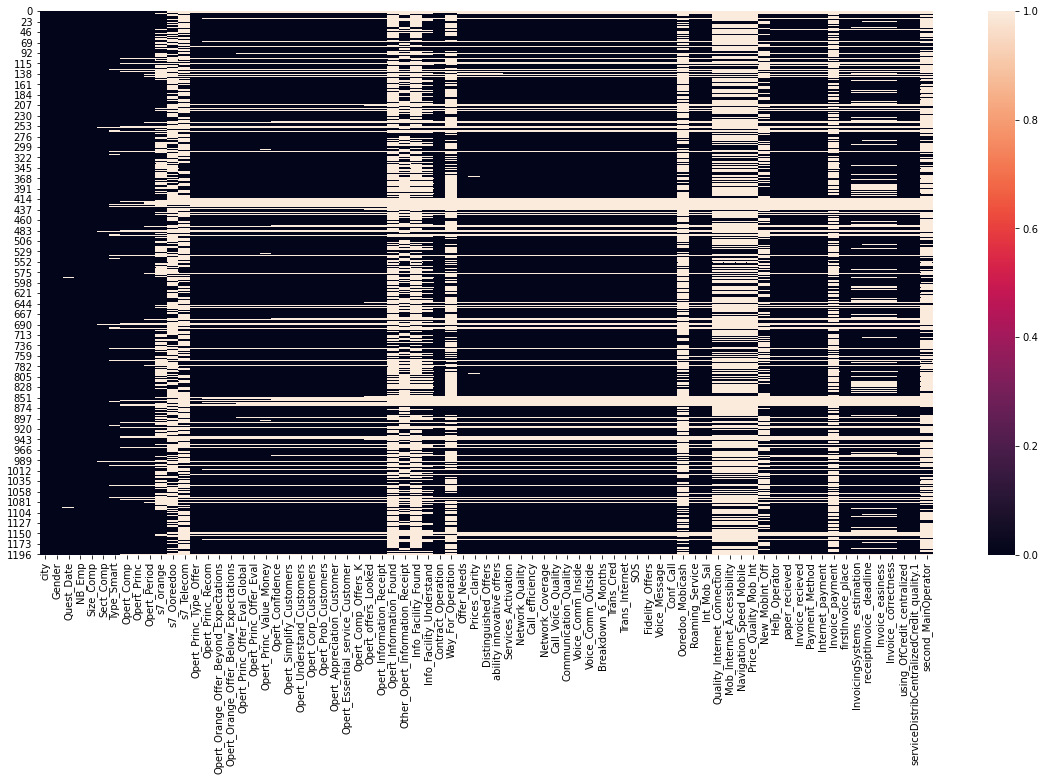

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

<AxesSubplot:ylabel='None'>

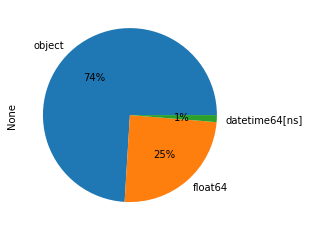

In [ ]:
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
#nettoyage des valeurs manquantes par rapport aux colonnes : < 70%
df=df[df.columns[df.isna().sum()/df.shape[0] < 0.7]]
print("taille restante",df.shape)


taille restante (1197, 72)


In [ ]:
#suppression ligne ayant plus de 70% valeurs manquantes
l=[]
for i in range(len(df)):
    if (df.iloc[i].isna().sum()/df.shape[1])>0.7:
        l.append(i)
df=df.drop(l,errors="ignore")
print("taille restante",df.shape)
df.reset_index(inplace=True, drop=True)



taille restante (1025, 72)


In [ ]:
#pourcentage valeurs manquantes par colonne
(df.isna().sum()/df.shape[0]).sort_values()

city                                         0.000000
Opert_Comp_Offers_K                          0.000000
Opert_Essential_service_Customer             0.000000
Opert_Appreciation_Customer                  0.000000
Opert_Prob_Customers                         0.000000
Opert_Understand_Customers                   0.000000
Opert_Simplify_Customers                     0.000000
Opert_Confidence                             0.000000
Opert_Princ_Offer_Eval                       0.000000
Opert_Princ_Offer_Eval_Global                0.000000
Opert_Orange_Offer_Below_Expectations        0.000000
Opert_Orange_Offer_Beyond_Expectations       0.000000
Opert_Princ_Recom                            0.000000
Opert_Corp_Customers                         0.000000
NB_Emp                                       0.000000
Gender                                       0.000000
Size_Comp                                    0.000000
Opert_Comp                                   0.000000
Sect_Comp                   

In [ ]:
#remplissage valeurs manquantes colonnes ayant moins de 20% de champs manquants
for col in df.columns:
    if((df[col].isna().sum()/df.shape[0])<=0.2):
        df[col] = df[col].fillna(df[col].mode()[0])


<AxesSubplot:>

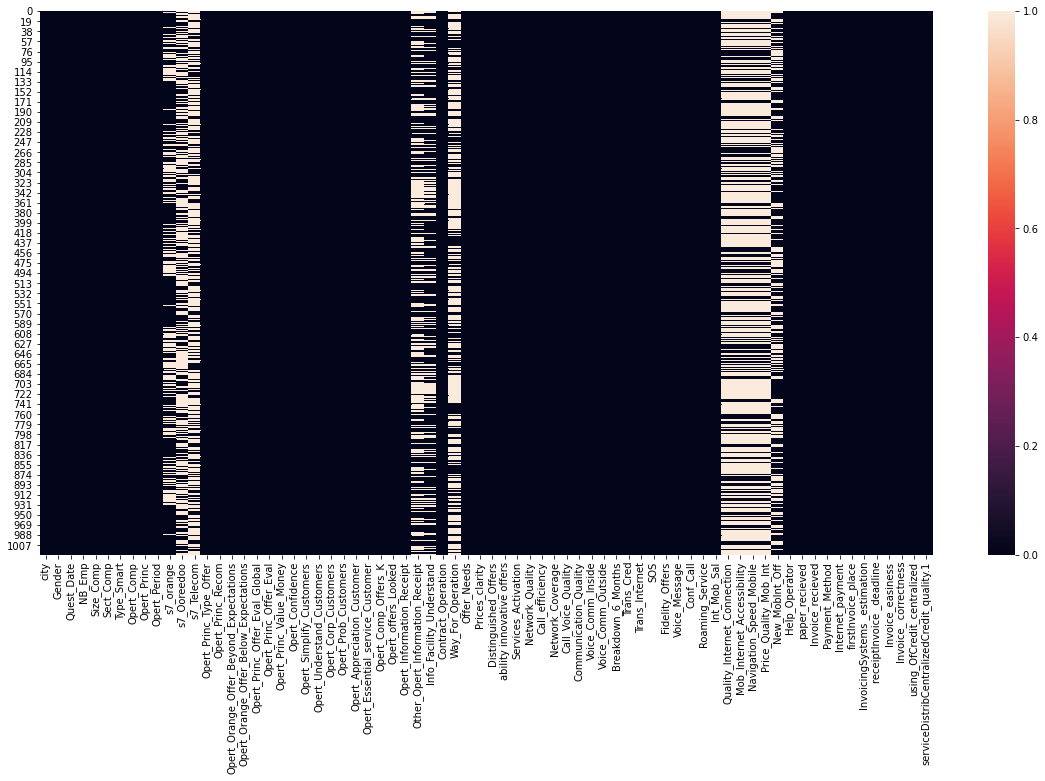

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [ ]:
#encodage colonnes categorielle à deux modalite
categorical_cols2 = df.columns[((df.nunique()==2) & (df.dtypes==object))].tolist()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[categorical_cols2] = df[categorical_cols2].apply(lambda col: le.fit_transform(col))

print(len(categorical_cols2),' colonnes categorielles à deux modalité:\n',categorical_cols2)
df

20  colonnes categorielles à deux modalité:
 ['Gender', 'Size_Comp', 'Type_Smart', 'Opert_Comp_Offers_K', 'Breakdown_6_Months', 'Trans_Cred', 'Trans_Internet', 'SOS', 'Fidelity_Offers', 'Voice_Message', 'Conf_Call', 'Roaming_Service', 'Int_Mob_Sal', 'Help_Operator', 'paper_recieved', 'Invoice_recieved', 'Payment_Method', 'Internet_payment', 'firstInvoice_place', 'using_OfCredit_centralized']


,city,Gender,Quest_Date,NB_Emp,Size_Comp,Sect_Comp,Type_Smart,Opert_Comp,Opert_Princ,Opert_Period,s7_orange,s7_Ooreedoo,s7_Telecom,Opert_Princ_Type_Offer,Opert_Princ_Recom,Opert_Orange_Offer_Beyond_Expectations,Opert_Orange_Offer_Below_Expectations,Opert_Princ_Offer_Eval_Global,Opert_Princ_Offer_Eval,Opert_Princ_Value_Money,Opert_Confidence,Opert_Simplify_Customers,Opert_Understand_Customers,Opert_Corp_Customers,Opert_Prob_Customers,Opert_Appreciation_Customer,Opert_Essential_service_Customer,Opert_Comp_Offers_K,Opert_offers_Looked,Opert_Information_Receipt,Other_Opert_Information_Receipt,Info_Facility_Understand,Contract_Operation,Way_For_Operation,Offer_Needs,Prices_clarity,Distinguished_Offers,ability innovative offers,Services_Activation,Network_Quality,Call_efficiency,Network_Coverage,Call_Voice_Quality,Communication_Quality,Voice_Comm_Inside,Voice_Comm_Outside,Breakdown_6_Months,Trans_Cred,Trans_Internet,SOS,Fidelity_Offers,Voice_Message,Conf_Call,Roaming_Service,Int_Mob_Sal,Quality_Internet_Connection,Mob_Internet_Accessibility,Navigation_Speed_Mobile,Price_Quality_Mob_Int,New_MobInt_Off,Help_Operator,paper_recieved,Invoice_recieved,Payment_Method,Internet_payment,firstInvoice_place,InvoicingSystems _estimation,receiptInvoice _deadline,Invoice_easiness,Invoice_ correctness,using_OfCredit_centralized,serviceDistribCentralizedCredit_quality.1
0,TUNIS,1,2017-03-14,20.0,0,Industrie,1,Orange/Ooredoo,Ooredoo,1 an à moins de 2 ans,Les abonnements mobiles sont fournis par l’en...,Les abonnements mobiles sont fournis par l’en...,NaN,Offre mobile prépayée,6.0,rien a signaler,rien a signaler,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0,NON,NON,NaN,NaN,aucun,NaN,8.0,8.0,8.0,8.0,7.0,7.0,2,9.0,9,9,9,9,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,Ne sait pas,0,0,0,0,0,0,7,7,7,7,0,11
1,TUNIS,0,2017-03-16,11.0,0,Services,1,Orange,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,NaN,NaN,Offre mobile postpayé,5.0,4ans,4ans,5.0,6.0,5.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,0,NON,OUI,NaN,NaN,aucun,NaN,7.0,7.0,8.0,7.0,7.0,8.0,4,7.0,7,7,7,7,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,7,7,7,7,0,8
2,TUNIS,0,2017-03-16,11.0,0,Services,1,Orange,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,NaN,NaN,Offre mobile prépayée,6.0,4ans,4ans,6.0,6.0,6.0,5.0,6.0,4.0,6.0,5.0,7.0,6.0,0,NON,OUI,/Via affichage publicitaire /Via la télévision...,6,aucun,NaN,5.0,6.0,5.0,5.0,5.0,5.0,4,6.0,6,5,5,5,0,1,1,0,0,0,0,0,0,6,7,6,6,NaN,0,0,0,1,0,0,4,5,6,7,0,5
3,SFAX,0,2017-03-15,10.0,0,Industrie,1,Ooredoo,Ooredoo,3 mois à moins de 6 mois,NaN,Les abonnements mobiles sont fournis par l’en...,NaN,Offre mobile prépayée,3.0,K,Ffg,5.0,7.0,5.0,6.0,7.0,7.0,6.0,7.0,6.0,7.0,0,NON,NE SAIT PAS,NaN,NaN,Résilié un contrat ou abonnement,Eté en boutique,7.0,7.0,8.0,7.0,7.0,8.0,4,7.0,7,7,7,7,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,7,7,7,7,0,8
4,TUNIS,0,2017-03-17,12.0,0,Santé (Healthcare),0,Orange/Tunisie Télécom,Tunisie Télécom,3 ans ou plus,Certains ou tous les employés ont leur propre...,NaN,Les abonnements mobiles sont fournis par l’en...,Offre mobile postpayé,1.0,Le prix de la minute est minimisė,Ras,6.0,5.0,6.0,2.0,3.0,9.0,5.0,5.0,3.0,3.0,1,OUI,NON,NaN,4,Signé un contrat avec votre opérateur principa...,Eté en boutique,1.0,4.0,3.0,4.0,7.0,8.0,3,8.0,8,8,8,8,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,"Non, probablement pas",0,1,0,0,0,0,3,2,2,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,TUNIS,0,2017-03-23,15.0,0,Commerce (retail),0,Orange/Ooredoo/Tunisie Télécom,Ooredoo,3 ans ou plus,Certains ou tous les employés ont leur propre...,Les abonnements mobiles sont fournis par l’en...,NaN,Offre mobile prépayée,5.0,Ras,Ras,6.0,4.0,4.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,0,NON,NON,NaN,NaN,aucun,NaN,6.0,6.0,5.0,3.0,7.0,6.

<AxesSubplot:>

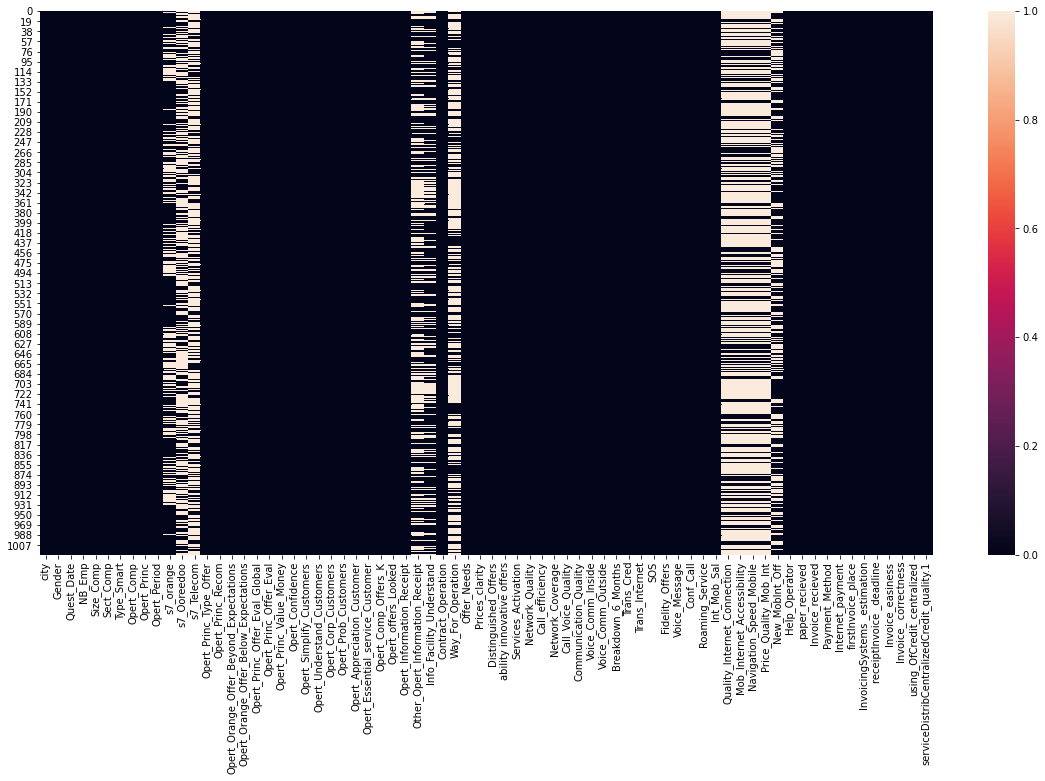

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

<AxesSubplot:ylabel='None'>

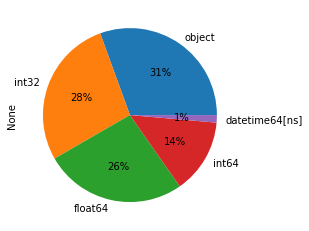

In [ ]:
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
#transformation des colonnes categorielle a valeur numerique en type numerique
print(df.isnull().sum().sum())
print(df.shape)
categorical_cols_encode = df.columns[(df.dtypes==object)].tolist()
df[categorical_cols_encode] =df[categorical_cols_encode].apply(pd.to_numeric, errors='ignore', axis=1)
print(df.isnull().sum().sum())
print(df.shape)

6009
(1025, 72)
6009
(1025, 72)


<AxesSubplot:ylabel='None'>

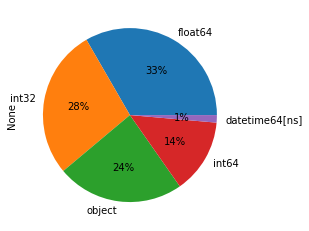

In [ ]:
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
df.dtypes

city                                                 object
Gender                                                int32
Quest_Date                                   datetime64[ns]
NB_Emp                                              float64
Size_Comp                                             int32
Sect_Comp                                            object
Type_Smart                                            int32
Opert_Comp                                           object
Opert_Princ                                          object
Opert_Period                                         object
s7_orange                                            object
s7_Ooreedoo                                          object
s7_Telecom                                           object
Opert_Princ_Type_Offer                               object
Opert_Princ_Recom                                   float64
Opert_Orange_Offer_Beyond_Expectations               object
Opert_Orange_Offer_Below_Expectations   

<AxesSubplot:ylabel='None'>

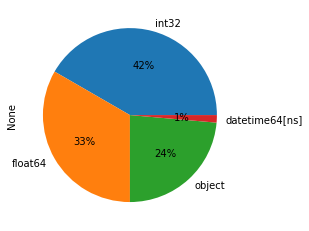

In [ ]:
d = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
df = df.astype(d)
d = dict.fromkeys(df.select_dtypes(np.uint8).columns, np.int32)
df = df.astype(d)
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
df.select_dtypes(include=['int32','float64']).columns[1:]

Index(['NB_Emp', 'Size_Comp', 'Type_Smart', 'Opert_Princ_Recom',
       'Opert_Princ_Offer_Eval_Global', 'Opert_Princ_Offer_Eval',
       'Opert_Princ_Value_Money', 'Opert_Confidence',
       'Opert_Simplify_Customers', 'Opert_Understand_Customers',
       'Opert_Corp_Customers', 'Opert_Prob_Customers',
       'Opert_Appreciation_Customer', 'Opert_Essential_service_Customer',
       'Opert_Comp_Offers_K', 'Info_Facility_Understand', 'Offer_Needs',
       'Prices_clarity', 'Distinguished_Offers', 'ability innovative offers',
       'Services_Activation', 'Network_Quality', 'Call_efficiency',
       'Network_Coverage', 'Call_Voice_Quality', 'Communication_Quality',
       'Voice_Comm_Inside', 'Voice_Comm_Outside', 'Breakdown_6_Months',
       'Trans_Cred', 'Trans_Internet', 'SOS', 'Fidelity_Offers',
       'Voice_Message', 'Conf_Call', 'Roaming_Service', 'Int_Mob_Sal',
       'Quality_Internet_Connection', 'Mob_Internet_Accessibility',
       'Navigation_Speed_Mobile', 'Price_Quality_Mob

In [ ]:
services_col = df.select_dtypes(include=['int32','float64']).columns[1:].to_numpy()
services_col

array(['NB_Emp', 'Size_Comp', 'Type_Smart', 'Opert_Princ_Recom',
       'Opert_Princ_Offer_Eval_Global', 'Opert_Princ_Offer_Eval',
       'Opert_Princ_Value_Money', 'Opert_Confidence',
       'Opert_Simplify_Customers', 'Opert_Understand_Customers',
       'Opert_Corp_Customers', 'Opert_Prob_Customers',
       'Opert_Appreciation_Customer', 'Opert_Essential_service_Customer',
       'Opert_Comp_Offers_K', 'Info_Facility_Understand', 'Offer_Needs',
       'Prices_clarity', 'Distinguished_Offers',
       'ability innovative offers', 'Services_Activation',
       'Network_Quality', 'Call_efficiency', 'Network_Coverage',
       'Call_Voice_Quality', 'Communication_Quality', 'Voice_Comm_Inside',
       'Voice_Comm_Outside', 'Breakdown_6_Months', 'Trans_Cred',
       'Trans_Internet', 'SOS', 'Fidelity_Offers', 'Voice_Message',
       'Conf_Call', 'Roaming_Service', 'Int_Mob_Sal',
       'Quality_Internet_Connection', 'Mob_Internet_Accessibility',
       'Navigation_Speed_Mobile', 'Price_Qual

In [ ]:
clientType_col = []
services_col = ['Opert_Princ_Recom', 'Opert_Princ_Offer_Eval_Global',
       'Opert_Princ_Offer_Eval', 'Opert_Princ_Value_Money',
       'Opert_Confidence', 'Opert_Simplify_Customers',
       'Opert_Understand_Customers', 'Opert_Corp_Customers',
       'Opert_Prob_Customers', 'Opert_Appreciation_Customer',
       'Opert_Essential_service_Customer', 'Info_Facility_Understand',
       'Offer_Needs', 'Prices_clarity', 'Distinguished_Offers',
       'ability innovative offers', 'Services_Activation',
       'Network_Quality', 'Call_efficiency', 'Network_Coverage',
       'Call_Voice_Quality', 'Communication_Quality', 'Voice_Comm_Inside',
       'Voice_Comm_Outside', 'Quality_Internet_Connection',
       'Mob_Internet_Accessibility', 'Navigation_Speed_Mobile',
       'Price_Quality_Mob_Int', 'InvoicingSystems _estimation',
       'receiptInvoice _deadline', 'Invoice_easiness',
       'Invoice_ correctness',
       'serviceDistribCentralizedCredit_quality.1']
for i in range(0,len(df)):
    clientType_col.append("Entreprise")
    if i>=len(services_col):
        services_col.append(np.nan)
df.insert(2, "ClientType", clientType_col)
df.insert(2, "Services", services_col)
df.columns

Index(['city', 'Gender', 'Services', 'ClientType', 'Quest_Date', 'NB_Emp',
       'Size_Comp', 'Sect_Comp', 'Type_Smart', 'Opert_Comp', 'Opert_Princ',
       'Opert_Period', 's7_orange', 's7_Ooreedoo', 's7_Telecom',
       'Opert_Princ_Type_Offer', 'Opert_Princ_Recom',
       'Opert_Orange_Offer_Beyond_Expectations',
       'Opert_Orange_Offer_Below_Expectations',
       'Opert_Princ_Offer_Eval_Global', 'Opert_Princ_Offer_Eval',
       'Opert_Princ_Value_Money', 'Opert_Confidence',
       'Opert_Simplify_Customers', 'Opert_Understand_Customers',
       'Opert_Corp_Customers', 'Opert_Prob_Customers',
       'Opert_Appreciation_Customer', 'Opert_Essential_service_Customer',
       'Opert_Comp_Offers_K', 'Opert_offers_Looked',
       'Opert_Information_Receipt', 'Other_Opert_Information_Receipt',
       'Info_Facility_Understand', 'Contract_Operation', 'Way_For_Operation',
       'Offer_Needs', 'Prices_clarity', 'Distinguished_Offers',
       'ability innovative offers', 'Services_Activat

In [ ]:
#export csv
df.to_csv('v6_QoS_cleaned.csv', index = False)


In [ ]:
#export exel
#df.to_excel('v6_QoScleaned.xlsx', index = False)

In [ ]:
#export exel
#exel=df.copy()
#exel['Quest_Date']=exel['Quest_Date'].astype(str)
#exel.to_excel('QoScleaned1.xlsx', index = False)